In [46]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

## 1. Load Dataset

In [47]:
gitURL = "https://raw.githubusercontent.com/theegolf/Remote-Work-Productivity-Analysis/refs/heads/main/remote_worker_productivity_1000.csv"
df = pd.read_csv(gitURL)
df.head(30)

worker_id location_type industry_sector  age  experience_years  \
0      W0001       Village      Healthcare   23                26   
1      W0002          City      Healthcare   27                27   
2      W0003       Village          Retail   30                 8   
3      W0004       Village         Finance   54                19   
4      W0005          City       Education   46                 1   
5      W0006          City         Finance   34                29   
6      W0007       Village         Finance   30                14   
7      W0008          Town      Healthcare   34                20   
8      W0009       Village         Finance   52                13   
9      W0010       Village              IT   32                 8   
10     W0011       Village      Healthcare   25                20   
11     W0012       Village              IT   55                33   
12     W0013          City       Education   59                26   
13     W0014       Village      Healthcare   25                21   
14     W0015          Town       Education   59                 9   
15     W0016          City      Healthcare   40                24   
16     W0017          Town          Retail   27                17   
17     W0018          Town         Finance   55                24   
18     W0019          Town          Retail   39                21   
19     W0020          Town       Education   34                13   
20     W0021          City         Finance   44                11   
21     W0022          City      Healthcare   40                19   
22     W0023          Town         Finance   32                11   
23     W0024          Town              IT   22                13   
24     W0025          City         Finance   45                 1   
25     W0026          City              IT   28                19   
26     W0027          City         Finance   46                12   
27     W0028       Village              IT   42                 8   
28     W0029       Village       Education   36                 8   
29     W0030       Village          Retail   22                12   

    average_daily_work_hours  break_frequency_per_day  task_completion_rate  \
0                       7.45                        1             66.377024   
1                       9.82                        3             88.226501   
2                       7.38                        2             67.004170   
3                       8.37                        1             66.004424   
4                       7.51                        4             91.468942   
5                       7.98                        5             78.688628   
6                       7.85                        5             96.705405   
7                       6.99                        3             70.072440   
8                       8.81                        1             78.349125   
9                       8.36                        4             81.041114   
10                      8.73                        1             99.405373   
11                      7.88                        5             73.345321   
12                      6.41                        1             81.322946   
13                      9.55                        4             82.849723   
14                      7.18                        3             71.390620   
15                      7.94                        2             81.379252   
16                      8.26                        1             66.595172   
17                      7.93                        2             90.672406   
18                      8.60                        5             72.129984   
19                      8.79                        3             79.245074   
20                      7.23                        3             82.172205   
21                      9.45                        1             63.238882   
22                      7.18                  

## 2.1 Dataset Overview

In [48]:
df.shape

(1000, 17)

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   worker_id                 1000 non-null   object 
 1   location_type             1000 non-null   object 
 2   industry_sector           1000 non-null   object 
 3   age                       1000 non-null   int64  
 4   experience_years          1000 non-null   int64  
 5   average_daily_work_hours  1000 non-null   float64
 6   break_frequency_per_day   1000 non-null   int64  
 7   task_completion_rate      1000 non-null   float64
 8   late_task_ratio           1000 non-null   float64
 9   calendar_scheduled_usage  1000 non-null   float64
 10  focus_time_minutes        1000 non-null   float64
 11  tool_usage_frequency      1000 non-null   int64  
 12  automated_task_count      1000 non-null   int64  
 13  AI_assisted_planning      1000 non-null   int64  
 14  real_time

In [50]:
df.isnull().sum()

worker_id                   0
location_type               0
industry_sector             0
age                         0
experience_years            0
average_daily_work_hours    0
break_frequency_per_day     0
task_completion_rate        0
late_task_ratio             0
calendar_scheduled_usage    0
focus_time_minutes          0
tool_usage_frequency        0
automated_task_count        0
AI_assisted_planning        0
real_time_feedback_score    0
productivity_label          0
productivity_score          0
dtype: int64

In [51]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
995    False
996    False
997    False
998    False
999    False
Length: 1000, dtype: bool

## 2.2 Basic Data Aggregation

In [52]:
df['location_type'].value_counts()

location_type
City       355
Town       326
Village    319
Name: count, dtype: int64

In [53]:
df['industry_sector'].value_counts()

industry_sector
Retail        203
IT            203
Education     203
Healthcare    199
Finance       192
Name: count, dtype: int64

In [54]:
exclude_cols = ['industry_sector', 'productivity_label', 'worker_id', 'location_type']
agg_cols = [col for col in df.columns.tolist() if col not in exclude_cols]
agg_metrics = {col: 'mean' for col in agg_cols}

# Group once and aggregate all metrics
sector_average = df.groupby(['industry_sector'], observed=False).agg(agg_metrics).round(3).reset_index()

sector_average

industry_sector     age  experience_years  average_daily_work_hours  \
0       Education  41.340            17.212                     7.564   
1         Finance  39.500            18.536                     7.610   
2      Healthcare  40.377            17.824                     7.497   
3              IT  40.291            17.025                     7.418   
4          Retail  40.749            17.537                     7.384   

   break_frequency_per_day  task_completion_rate  late_task_ratio  \
0                    2.995                81.068            0.185   
1                    3.010                81.424            0.179   
2                    2.925                81.686            0.179   
3                    2.926                81.766            0.179   
4                    2.966                80.367            0.188   

   calendar_scheduled_usage  focus_time_minutes  tool_usage_frequency  \
0                    67.317             148.956                 9.099   
1                    68.441             153.021                 9.615   
2                    68.767             149.879                 9.523   
3                    68.468             151.719                 9.458   
4                    66.477             144.990                 9.182   

   automated_task_count  AI_assisted_planning  real_time_feedback_score  \
0                 7.202                 0.507                    74.419   
1                 7.177                 0.510                    74.333   
2                 7.191                 0.548                    73.980   
3                 6.724                 0.463                    74.448   
4                 6.877                 0.493                    73.399   

   productivity_score  
0              38.830  
1              39.332  
2              39.532  
3              39.317  
4              38.412

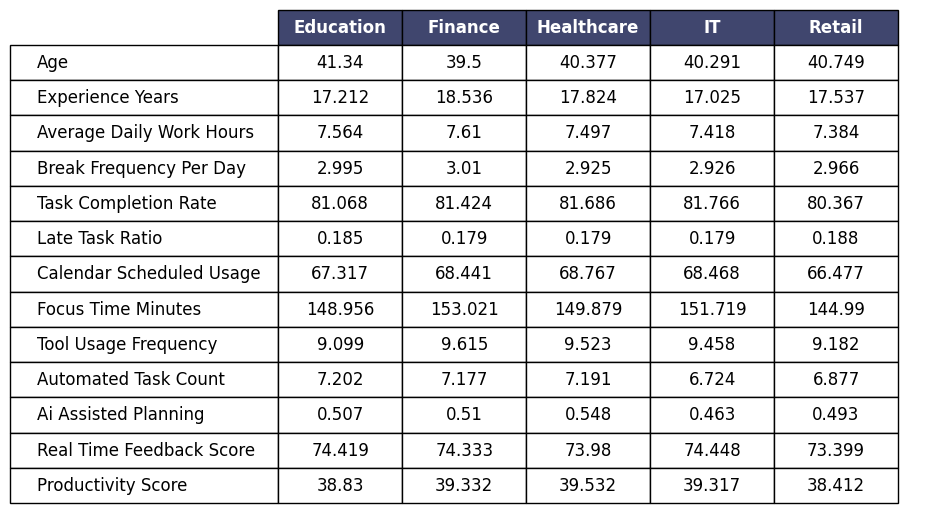

In [55]:
from pandas.plotting import table

# Rename columns
table1 = sector_average.copy()
table1.columns = [col.replace('_', ' ').title() for col in table1.columns]

table1 = table1.T
table1.columns = table1.iloc[0]  # Use first row as column names
table1 = table1.drop(table1.index[0])  # Remove the first row

fig, ax = plt.subplots(figsize=(len(table1.columns) * 1.9, len(table1) * 0.4))
ax.axis('off')

tab = table(ax, table1, loc='center', cellLoc='center', colWidths=[0.15]*len(table1.columns))
tab.auto_set_font_size(False)
tab.set_fontsize(12)
tab.scale(1.2, 1.8)

for i in range(len(table1.columns)):
    tab[(0, i)].set_facecolor('#40466e')
    tab[(0, i)].set_text_props(weight='bold', color='white')

plt.tight_layout()
plt.show()

In [56]:
averages = sector_average.iloc[:, 1:].mean()
avg_row = pd.DataFrame([['Average'] + averages.tolist()], columns=sector_average.columns)
sector_average2 = pd.concat([sector_average, avg_row], ignore_index=True)
sector_average2

industry_sector      age  experience_years  average_daily_work_hours  \
0       Education  41.3400           17.2120                    7.5640   
1         Finance  39.5000           18.5360                    7.6100   
2      Healthcare  40.3770           17.8240                    7.4970   
3              IT  40.2910           17.0250                    7.4180   
4          Retail  40.7490           17.5370                    7.3840   
5         Average  40.4514           17.6268                    7.4946   

   break_frequency_per_day  task_completion_rate  late_task_ratio  \
0                   2.9950               81.0680            0.185   
1                   3.0100               81.4240            0.179   
2                   2.9250               81.6860            0.179   
3                   2.9260               81.7660            0.179   
4                   2.9660               80.3670            0.188   
5                   2.9644               81.2622            0.182   

   calendar_scheduled_usage  focus_time_minutes  tool_usage_frequency  \
0                    67.317             148.956                9.0990   
1                    68.441             153.021                9.6150   
2                    68.767             149.879                9.5230   
3                    68.468             151.719                9.4580   
4                    66.477             144.990                9.1820   
5                    67.894             149.713                9.3754   

   automated_task_count  AI_assisted_planning  real_time_feedback_score  \
0                7.2020                0.5070                   74.4190   
1                7.1770                0.5100                   74.3330   
2                7.1910                0.5480                   73.9800   
3                6.7240                0.4630                   74.4480   
4                6.8770                0.4930                   73.3990   
5                7.0342                0.5042                   74.1158   

   productivity_score  
0             38.8300  
1             39.3320  
2             39.5320  
3             39.3170  
4             38.4120  
5             39.0846

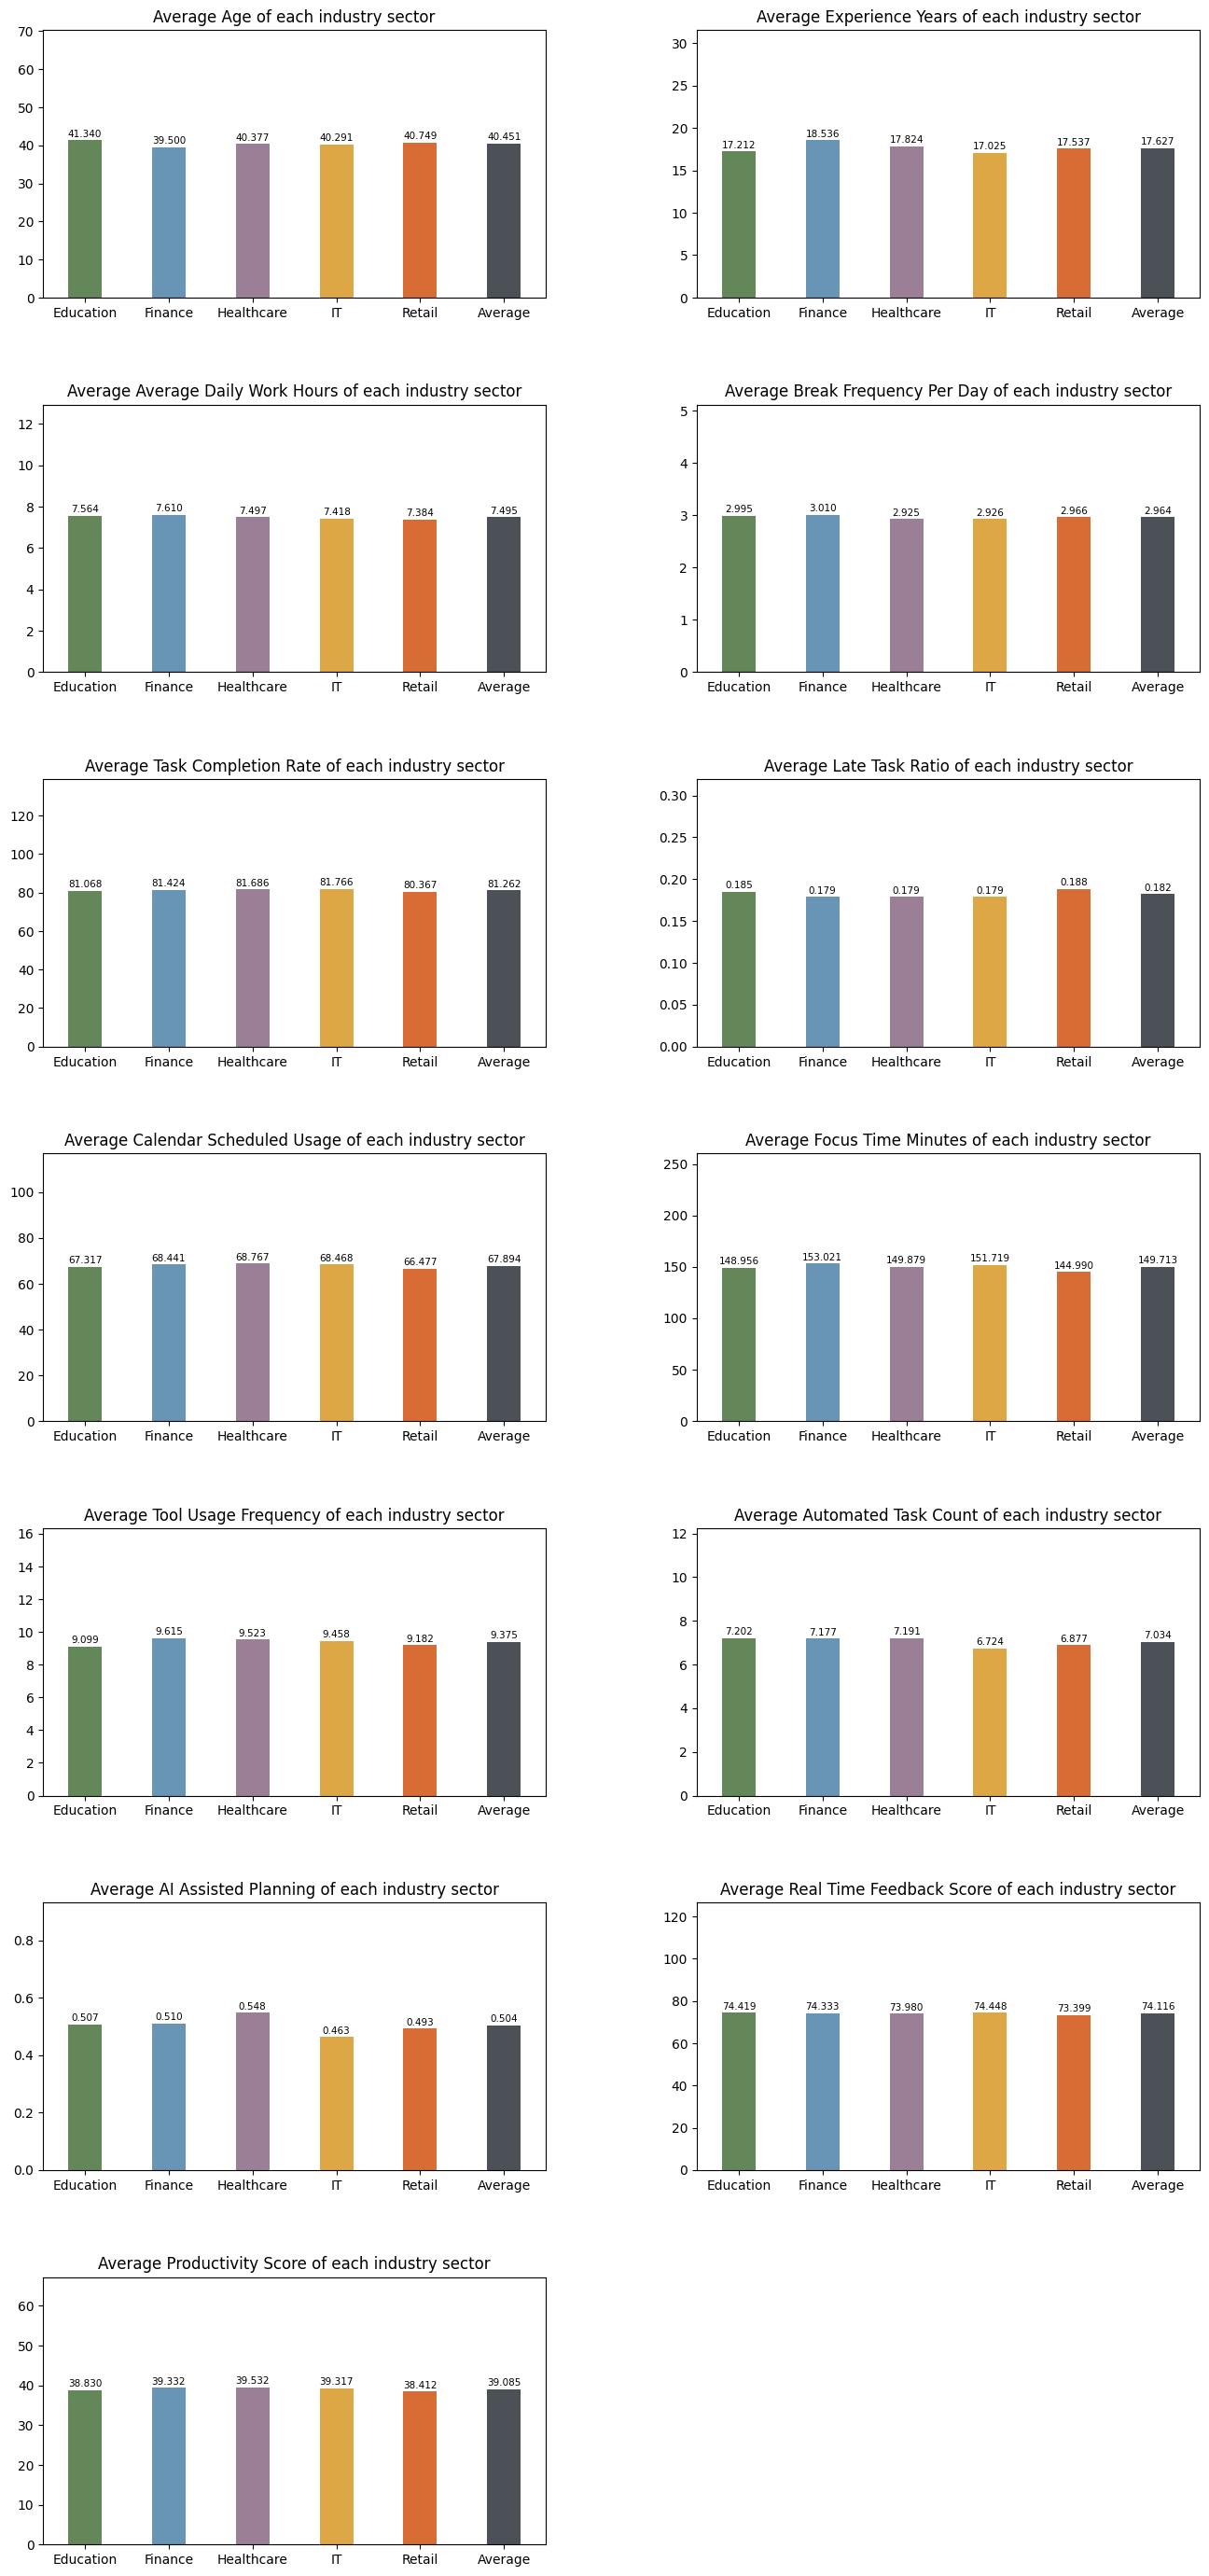

In [57]:
metrics = [col for col in sector_average2.columns if col not in ['industry_sector', 'productivity_label']]
sectorColor = {
    'Education': '#608E52',
    'Finance': '#5B96C2',
    'Healthcare': '#9E7B9B',
    'IT': '#F6AE2D',
    'Retail': '#F26419',
    'Average': '#495159'
}

n_metrics = len(metrics)
cols = 2
rows = (n_metrics + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(16, 5 * rows))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]

    sns.barplot(
        data=sector_average2,
        x='industry_sector',
        y=metric,
        hue='industry_sector',
        ax=ax,
        palette=sectorColor,
        dodge=False,
        width=0.4
    )

    max_val = sector_average2[metric].max()
    ax.set_ylim(0, max_val * 1.7)

    for bar in ax.patches:
        height = bar.get_height()
        if not np.isnan(height) and height > 0.01:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + max_val * 0.01,
                f'{height:.3f}',
                ha='center',
                va='bottom',
                fontsize=7.5
            )

    title_metric = metric.replace('_', ' ').title()
    title_metric= title_metric.replace('Ai', 'AI')
    ax.set_title(f'Average {title_metric} of each industry sector')
    ax.set_xlabel('')
    ax.set_ylabel('')
    ax.tick_params(axis='x', rotation=0)

# Remove extra axes
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.subplots_adjust(
    wspace=0.3,  # horizontal spacing between columns
    hspace=0.4   # vertical spacing between rows
)

plt.show()

In [58]:
exclude_cols = ['industry_sector', 'productivity_label', 'worker_id', 'location_type']
agg_cols = [col for col in df.columns.tolist() if col not in exclude_cols]
agg_metrics = {col: 'mean' for col in agg_cols}

# Group once and aggregate all metrics
sector_average3 = df.groupby(['industry_sector', 'productivity_label'], observed=False).agg(agg_metrics).round(3).reset_index()

sector_average3

industry_sector productivity_label     age  experience_years  \
0        Education               High  40.215            17.400   
1        Education                Low  42.254            17.776   
2        Education             Medium  41.507            16.507   
3          Finance               High  40.899            16.986   
4          Finance                Low  38.410            18.689   
5          Finance             Medium  39.016            20.113   
6       Healthcare               High  40.096            17.151   
7       Healthcare                Low  41.304            17.493   
8       Healthcare             Medium  39.614            19.088   
9               IT               High  40.243            17.329   
10              IT                Low  39.758            17.000   
11              IT             Medium  40.866            16.731   
12          Retail               High  39.214            17.357   
13          Retail                Low  41.535            16.761   
14          Retail             Medium  41.145            18.395   

    average_daily_work_hours  break_frequency_per_day  task_completion_rate  \
0                      7.364                    2.938                94.780   
1                      7.742                    2.925                66.868   
2                      7.579                    3.113                81.916   
3                      7.780                    2.754                94.550   
4                      7.664                    3.344                66.345   
5                      7.367                    2.968                81.653   
6                      7.420                    3.068                94.864   
7                      7.598                    2.870                67.451   
8                      7.471                    2.807                82.038   
9                      7.497                    2.800                95.299   
10                     7.307                    3.091                67.199   
11                     7.443                    2.896                81.977   
12                     7.472                    3.125                94.331   
13                     7.417                    3.014                67.105   
14                     7.288                    2.803                82.469   

    late_task_ratio  calendar_scheduled_usage  focus_time_minutes  \
0             0.052                    90.748             211.923   
1             0.318                    43.695              88.403   
2             0.181                    68.157             148.451   
3             0.051                    89.553             209.913   
4             0.328                    43.418              92.246   
5             0.175                    69.564             149.500   
6             0.051                    90.964             208.973   
7             0.320                    44.816              89.783   
8             0.173                    69.334             146.947   
9             0.048                    89.595             211.657   
10            0.328                    45.016              92.561   
11            0.169                    69.498             147.373   
12            0.047                    89.196             211.089   
13            0.316                    44.863              87.930   
14            0.171                    69.928             149.592   

    tool_usage_frequency  automated_task_count  AI_assisted_planning  \
0                 10.785                 6.785                 0.523   
1                  8.179                 7.313                 0.552   
2                  8.423                 7.479                 0.451   
3                 10.000                 6.913                 0.507   
4                 10.066                 6.820                 0.508   
5                  8.742                 7.823                 0.516   
6                  9.315                 7.616          

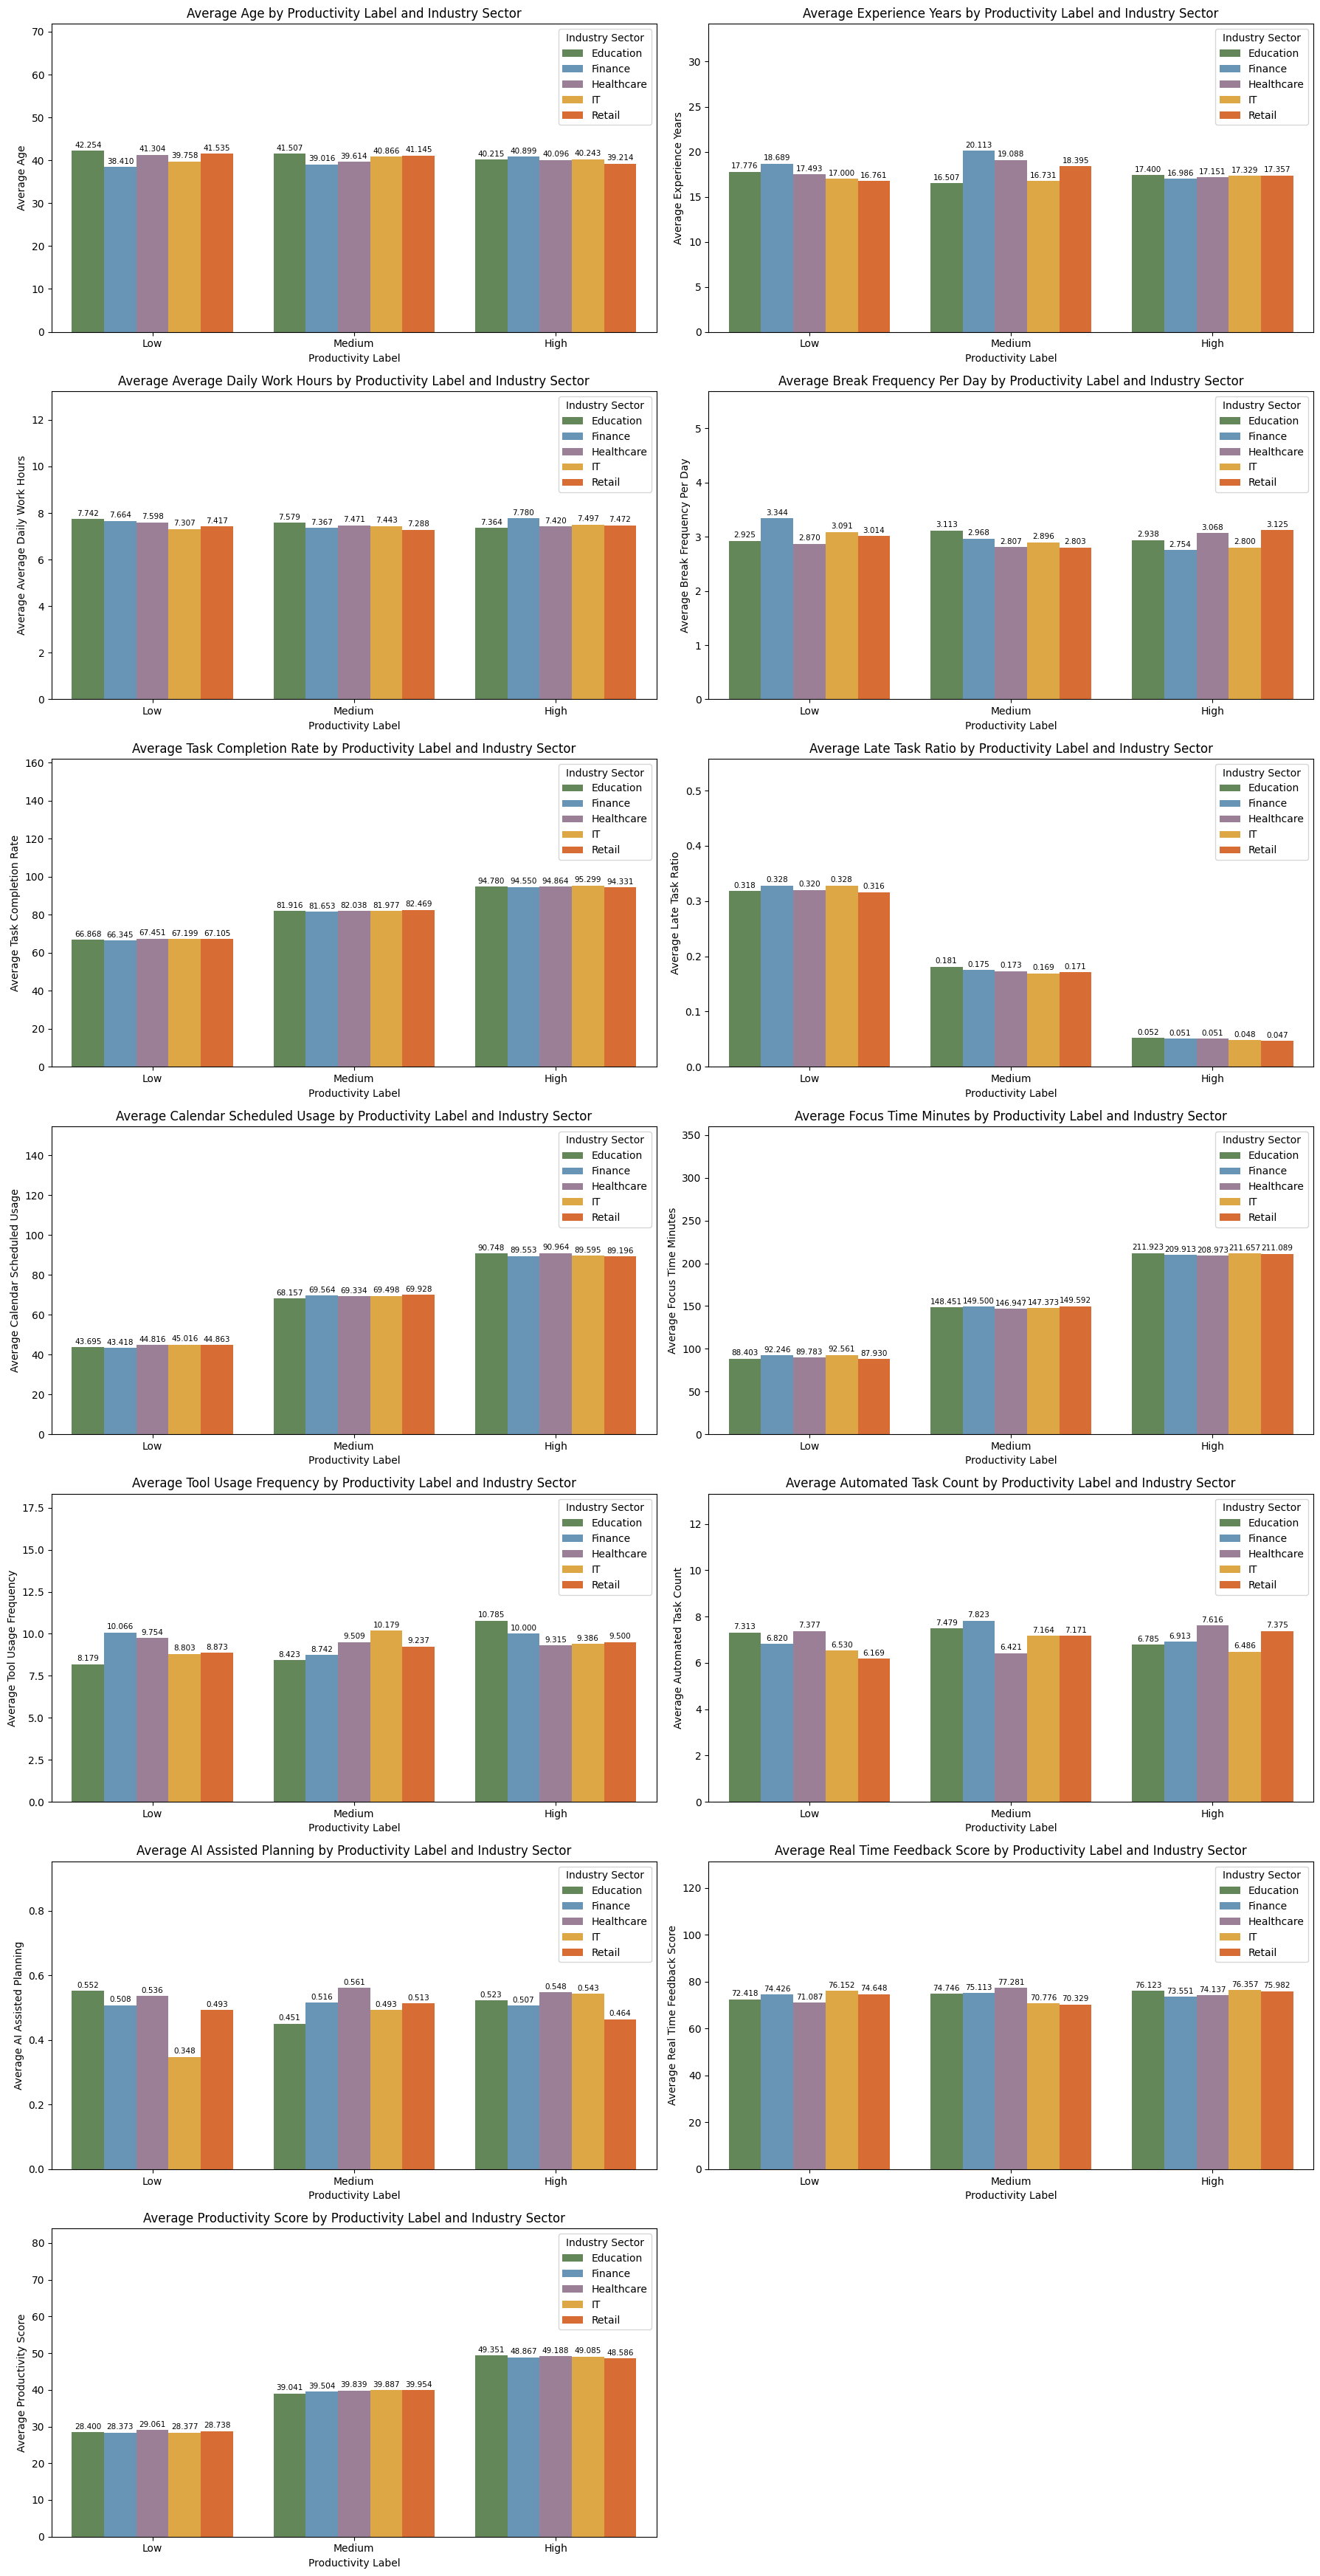

In [59]:
# List of metrics to plot (all columns except grouping columns)
metrics = [col for col in sector_average3.columns if col not in ['industry_sector', 'productivity_label']]
sectorColor = {
    'Education': '#608E52',
    'Finance': '#5B96C2',
    'Healthcare': '#9E7B9B',
    'IT': '#F6AE2D',
    'Retail': '#F26419',
    'Average': '#666666'
}

n_metrics = len(metrics)
cols = 2  # number of columns in subplot grid
rows = (n_metrics + cols - 1) // cols  # ceiling division for rows

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()  # flatten for easy indexing

# Loop over each metric and plot a barplot grouped by industry_sector and productivity_label
for i, metric in enumerate(metrics):
    ax = axes[i]

    sns.barplot(
        data=sector_average3,
        x='productivity_label',
        y=metric,
        hue='industry_sector',
        ax=ax,
        palette=sectorColor,
        order=['Low', 'Medium', 'High']
    )
    # Get max y value and extend y-axis by 20%
    max_val = sector_average3[metric].max()
    ax.set_ylim(0, max_val * 1.7)
    # Add value labels on top of bars
    for bar in ax.patches:
        height = bar.get_height()
        if not np.isnan(height) and height > 0.01:  # avoid labeling bars with NaN
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + max_val * 0.01,  # small gap above bar
                f'{height:.3f}',          # format value (1 decimal)
                ha='center',
                va='bottom',
                fontsize=7.5
            )

    title_metric = metric.replace('_', ' ').title()
    title_metric= title_metric.replace('Ai', 'AI')
    ax.set_title(f'Average {title_metric} by Productivity Label and Industry Sector')
    ax.set_xlabel('Productivity Label')
    ax.set_ylabel(f'Average {title_metric}')
    ax.tick_params(axis='x', rotation=0)
    ax.legend(title='Industry Sector')


# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


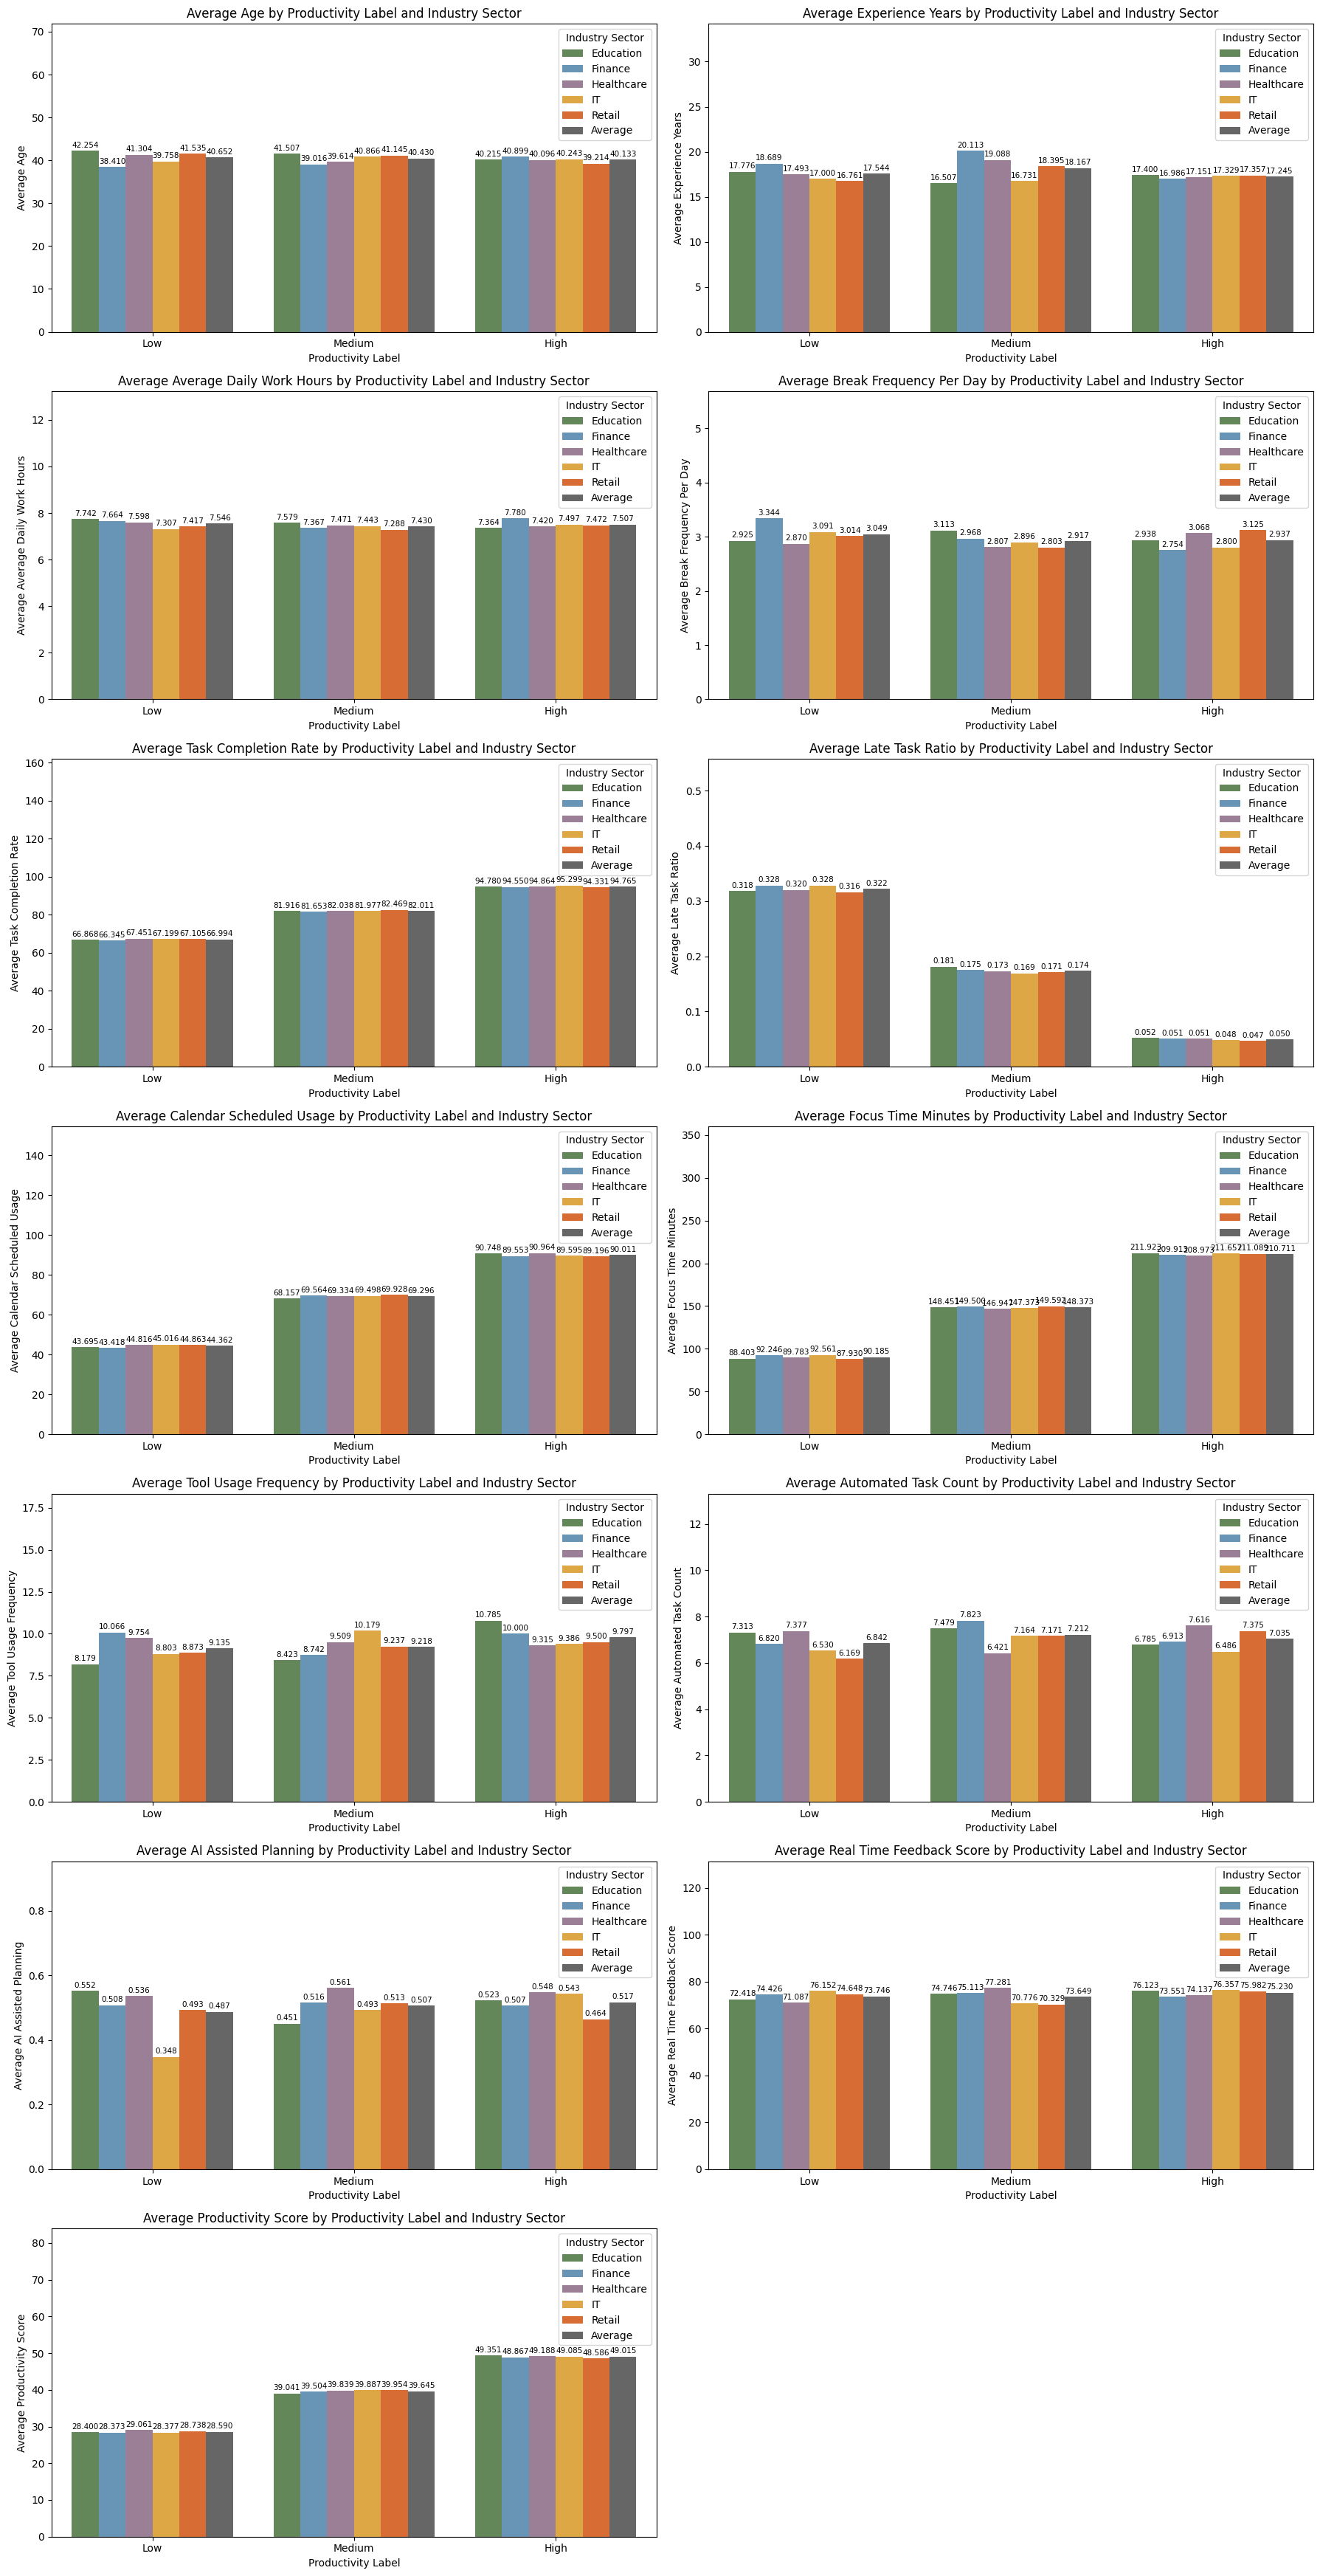

In [60]:
# 1. Setup
metrics = [col for col in sector_average3.columns if col not in ['industry_sector', 'productivity_label']]

sectorColor = {
    'Education': '#608E52',
    'Finance': '#5B96C2',
    'Healthcare': '#9E7B9B',
    'IT': '#F6AE2D',
    'Retail': '#F26419',
    'Average': '#666666'
}

# 2. Add Average Bars
# Calculate the mean per productivity_label (across all industry sectors)
avg_rows = sector_average3.groupby('productivity_label')[metrics].mean().reset_index()
avg_rows['industry_sector'] = 'Average'  # Label the group

# Append average rows to the original data
sector_avg_with_mean = pd.concat([sector_average3, avg_rows], ignore_index=True)

n_metrics = len(metrics)
cols = 2
rows = (n_metrics + cols - 1) // cols

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

# Ensure 'Average' appears after all real sectors
hue_order = list(sectorColor.keys())

for i, metric in enumerate(metrics):
    ax = axes[i]

    sns.barplot(
        data=sector_avg_with_mean,
        x='productivity_label',
        y=metric,
        hue='industry_sector',
        ax=ax,
        palette=sectorColor,
        order=['Low', 'Medium', 'High'],
        hue_order=hue_order
    )

    max_val = sector_avg_with_mean[metric].max()
    ax.set_ylim(0, max_val * 1.7)

    # Add value labels on bars
    for bar in ax.patches:
        height = bar.get_height()
        if not np.isnan(height) and height > 0.01:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + max_val * 0.01,
                f'{height:.3f}',
                ha='center',
                va='bottom',
                fontsize=7.5
            )

    # Axis titles
    title_metric = metric.replace('_', ' ').title().replace('Ai', 'AI')
    ax.set_title(f'Average {title_metric} by Productivity Label and Industry Sector')
    ax.set_xlabel('Productivity Label')
    ax.set_ylabel(f'Average {title_metric}')
    ax.tick_params(axis='x', rotation=0)
    ax.legend(title='Industry Sector')


# 5. Remove empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

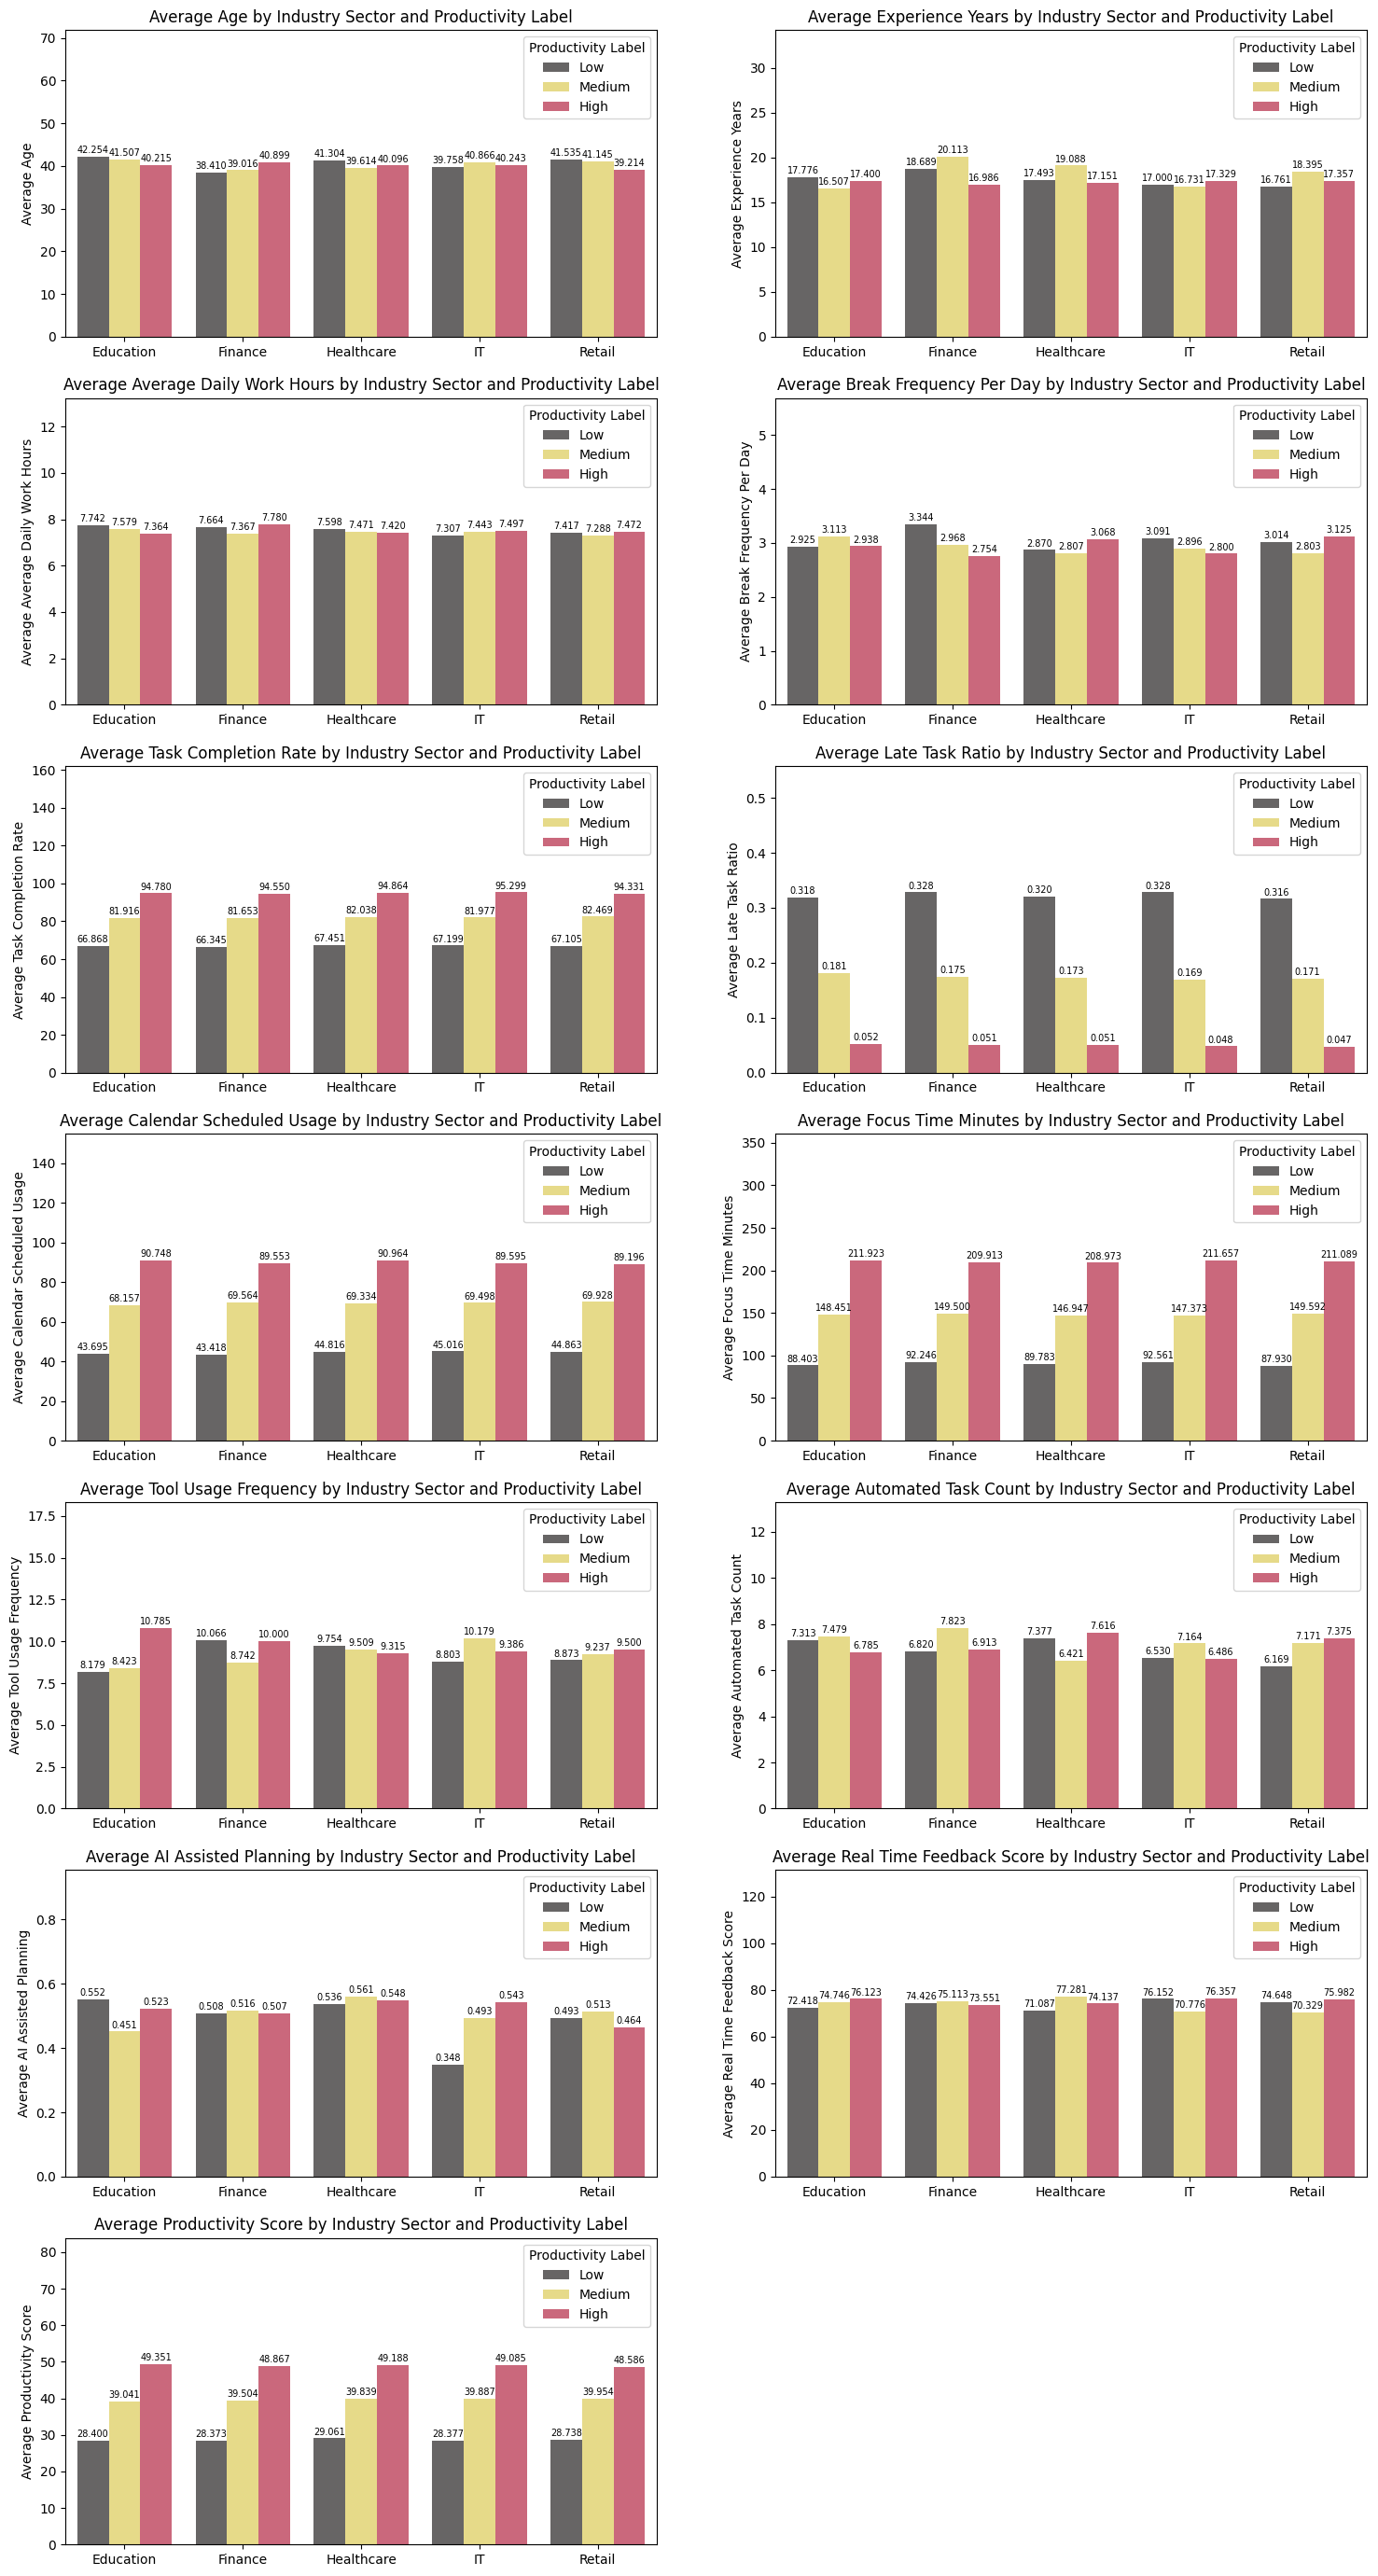

In [61]:
n_metrics = len(metrics)
cols = 2
rows = (n_metrics + cols - 1) // cols

productivityColor = {
    'Low': '#676565',
    'Medium': '#F5E57A',
    'High': '#DA5872'
}

fig, axes = plt.subplots(rows, cols, figsize=(18, 5 * rows))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]

    sns.barplot(
        data=sector_average3,
        x='industry_sector',
        y=metric,
        hue='productivity_label',
        ax=ax,
        palette=productivityColor,
        hue_order=['Low', 'Medium', 'High']
    )

    max_val = sector_average3[metric].max()
    ax.set_ylim(0, max_val * 1.7)

    for bar in ax.patches:
        height = bar.get_height()
        if not np.isnan(height) and height > 0.01:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + max_val * 0.01,
                f'{height:.3f}',
                ha='center',
                va='bottom',
                fontsize=7
            )

    title_metric = metric.replace('_', ' ').title().replace('Ai', 'AI')
    ax.set_title(f'Average {title_metric} by Industry Sector and Productivity Label')
    ax.set_xlabel('')
    ax.set_ylabel(f'Average {title_metric}')
    ax.tick_params(axis='x', rotation=0)
    ax.legend(title='Productivity Label')

# Remove unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])


plt.show()


## 2.3 Work-related metric

### 1. Create DataFrame

In [62]:
df2 = pd.DataFrame()
df2['productivity_score'] = df['productivity_score']
df2['real_time_feedback_score'] = df['real_time_feedback_score']
df2['location_type'] = df['location_type']
df2['industry_sector'] =  df['industry_sector']
df2['calendar_scheduled_usage'] =  df['calendar_scheduled_usage']

# Derived metrics
df2['workspan_per_break'] = df['average_daily_work_hours'] * 60 / df['break_frequency_per_day']
df2['focus_efficiency_ratio'] = (df['focus_time_minutes'] / (df['average_daily_work_hours'] * 60) * 100)
df2['task_stress'] = df['late_task_ratio'] * (1 -(df['task_completion_rate'] / 100))
df2

productivity_score  real_time_feedback_score location_type  \
0                 32.31                        80       Village   
1                 41.09                        83          City   
2                 25.69                        81       Village   
3                 31.98                        84       Village   
4                 48.19                        64          City   
..                  ...                       ...           ...   
995               48.53                        95          Town   
996               24.47                        84          Town   
997               47.63                        94       Village   
998               51.34                        62       Village   
999               39.49                        59          City   

    industry_sector  calendar_scheduled_usage  workspan_per_break  \
0        Healthcare                 55.496926              447.00   
1        Healthcare                 66.496755              196.40   
2            Retail                 41.367064              221.40   
3           Finance                 51.086805              502.20   
4         Education                 93.618344              112.65   
..              ...                       ...                 ...   
995          Retail                 85.911982              217.80   
996          Retail                 31.969860              133.80   
997              IT                 81.171254               85.56   
998       Education                 92.042037              116.25   
999         Finance                 74.670894               93.90   

     focus_efficiency_ratio  task_stress  
0                 23.713647     0.085612  
1                 23.930754     0.020413  
2                 20.776874     0.116091  
3                 18.717642     0.118250  
4                 44.829117     0.007301  
..                      ...          ...  
995               52.341598     0.001002  
996               22.670653     0.135412  
997               48.153343     0.000783  
998               41.720430     0.000430  
999               44.728435     0.045413  

[1000 rows x 8 columns]

In [63]:
ex_col = ['industry_sector', 'location_type']
col = [c for c in df2.columns if c not in ex_col]
work_intensity = pd.pivot_table(df2, index='industry_sector', values=col, aggfunc='mean')
work_intensity.loc['Average'] = work_intensity.mean(axis=0)
work_intensity

calendar_scheduled_usage  focus_efficiency_ratio  \
industry_sector                                                     
Education                       67.317106               34.018057   
Finance                         68.440553               34.269402   
Healthcare                      68.767416               34.337233   
IT                              68.468460               35.064804   
Retail                          66.476529               33.585601   
Average                         67.894013               34.255020   

                 productivity_score  real_time_feedback_score  task_stress  \
industry_sector                                                              
Education                 38.830148                 74.418719     0.046961   
Finance                   39.332396                 74.333333     0.046571   
Healthcare                39.531508                 73.979899     0.045870   
IT                        39.316601                 74.448276     0.045754   
Retail                    38.412118                 73.399015     0.048284   
Average                   39.084554                 74.115849     0.046688   

                 workspan_per_break  
industry_sector                      
Education                205.924187  
Finance                  203.475417  
Healthcare               216.898593  
IT                       210.717241  
Retail                   203.845025  
Average                  208.172093

In [64]:
ex_col = ['industry_sector', 'location_type']
col = [c for c in df2.columns if c not in ex_col]
work_intensity2 = pd.pivot_table(df2, index='industry_sector', values=col, aggfunc=['max', 'min', 'mean', 'std'])
work_intensity_stacked = work_intensity2.stack(level=0)

work_intensity_stacked.index.set_names(['industry_sector', 'Stat'], inplace=True)
work_intensity_stacked

/tmp/ipython-input-64-3573549967.py:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  work_intensity_stacked = work_intensity2.stack(level=0)


calendar_scheduled_usage  focus_efficiency_ratio  \
industry_sector Stat                                                     
Education       max                  99.971963               94.402673   
                mean                 67.317106               34.018057   
                min                  30.029647                9.413580   
                std                  19.981937               14.426110   
Finance         max                  99.872709               73.018991   
                mean                 68.440553               34.269402   
                min                  30.098248               10.342489   
                std                  19.908695               12.772110   
Healthcare      max                  99.987299               73.161189   
                mean                 68.767416               34.337233   
                min                  30.090528               11.866808   
                std                  20.652863               13.730873   
IT              max                  99.994153               91.412742   
                mean                 68.468460               35.064804   
                min                  30.765125               10.166667   
                std                  19.367758               13.591716   
Retail          max                  99.088954               78.629032   
                mean                 66.476529               33.585601   
                min                  30.565577               11.685824   
                std                  18.793808               13.606196   

                      productivity_score  real_time_feedback_score  \
industry_sector Stat                                                 
Education       max            55.200000                 99.000000   
                mean           38.830148                 74.418719   
                min            22.310000                 50.000000   
                std             8.817496                 13.397467   
Finance         max            53.860000                 99.000000   
                mean           39.332396                 74.333333   
                min            21.720000                 50.000000   
                std             8.757196                 14.432487   
Healthcare      max            52.990000                 99.000000   
                mean           39.531508                 73.979899   
                min            22.880000                 50.000000   
                std             8.834943                 14.905751   
IT              max            54.100000                 99.000000   
                mean           39.316601                 74.448276   
                min            23.270000                 50.000000   
                std             8.761856                 14.396474   
Retail          max            52.930000                 99.000000   
                mean           38.412118                 73.399015   
                min            20.560000                 50.000000   
                std             8.283304                 14.575967   

                       task_stress  workspan_per_break  
industry_sector Stat                                    
Education       max   1.451157e-01          648.000000  
                mean  4.696110e-02          205.924187  
                min   4.795606e-06           47.880000  
                std   4.443095e-02          134.371792  
Finance         max   1.415837e-01          583.200000  
                mean  4.657101e-02          203.475417  
                min   9.721564e-07           60.960000  
                std   4.704637e-02          132.947511  
Healthcare      max   1.461937e-01          578.400000  
                mean  4.587030e-02          216.898593  
                min   5.599812e-06           57.240000  
                std   4.540716e-02          141.275764  
IT              max   1.535430e-01          675.000000

### 2. Plot graphs

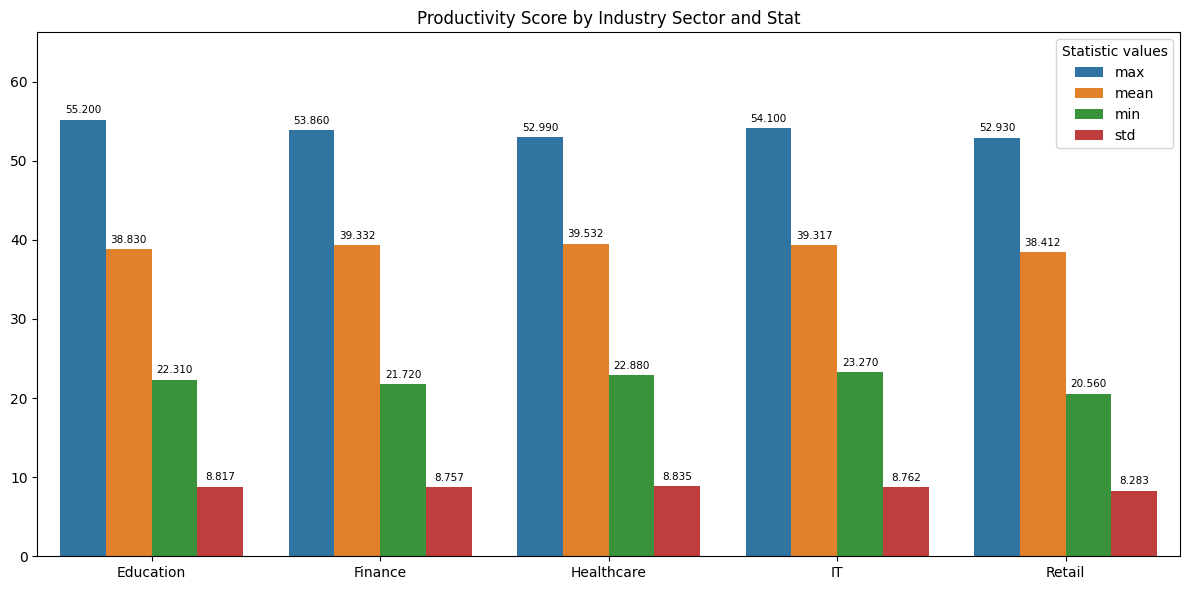

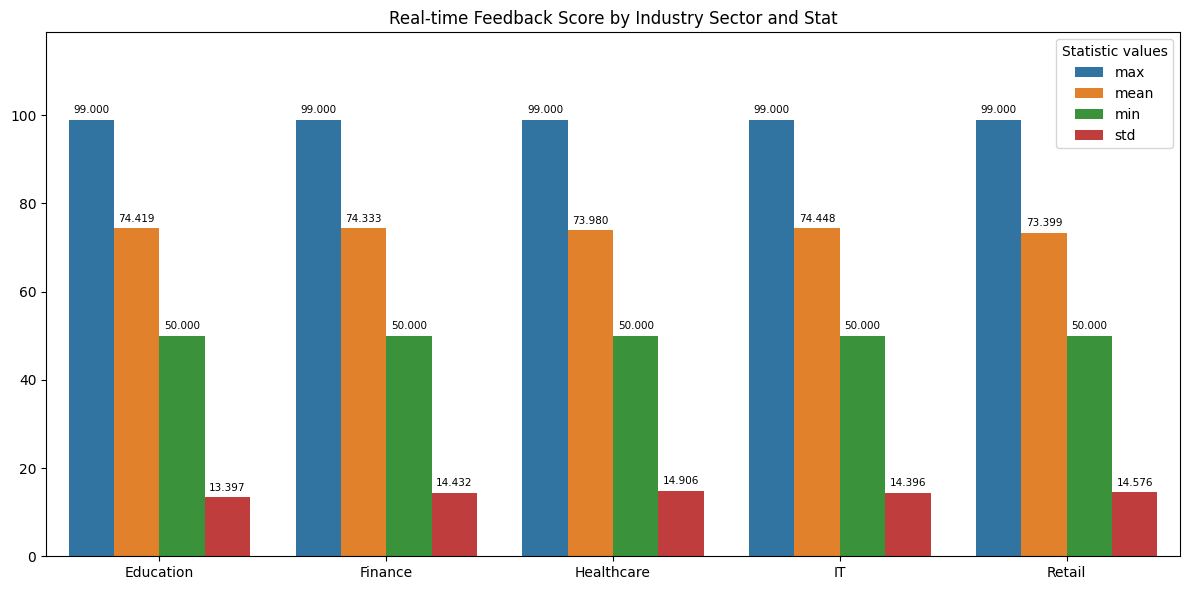

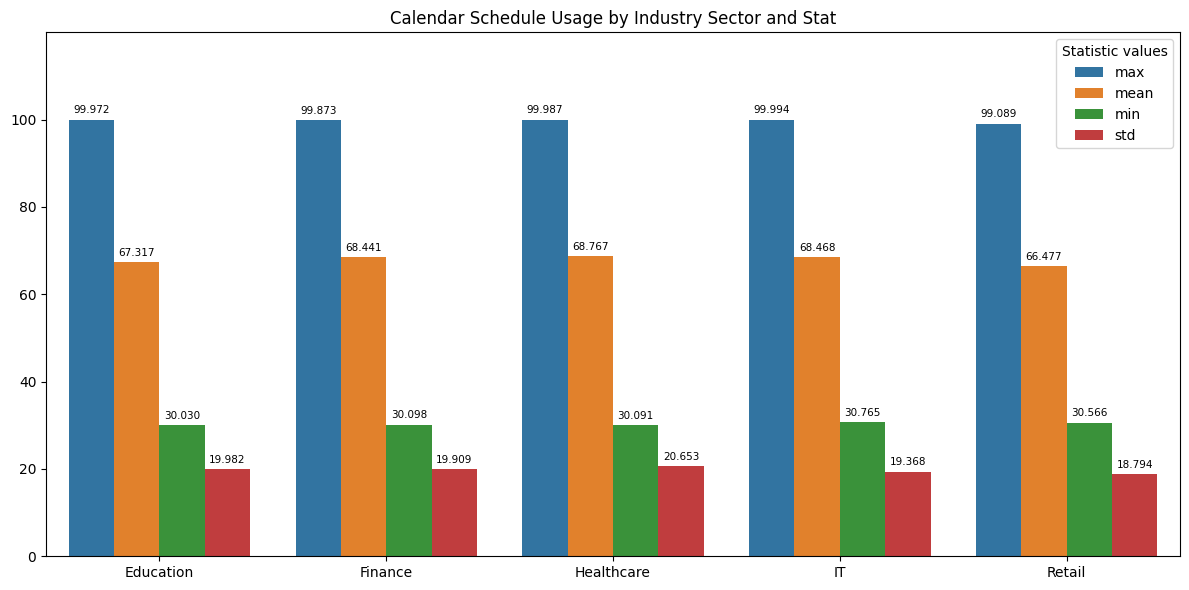

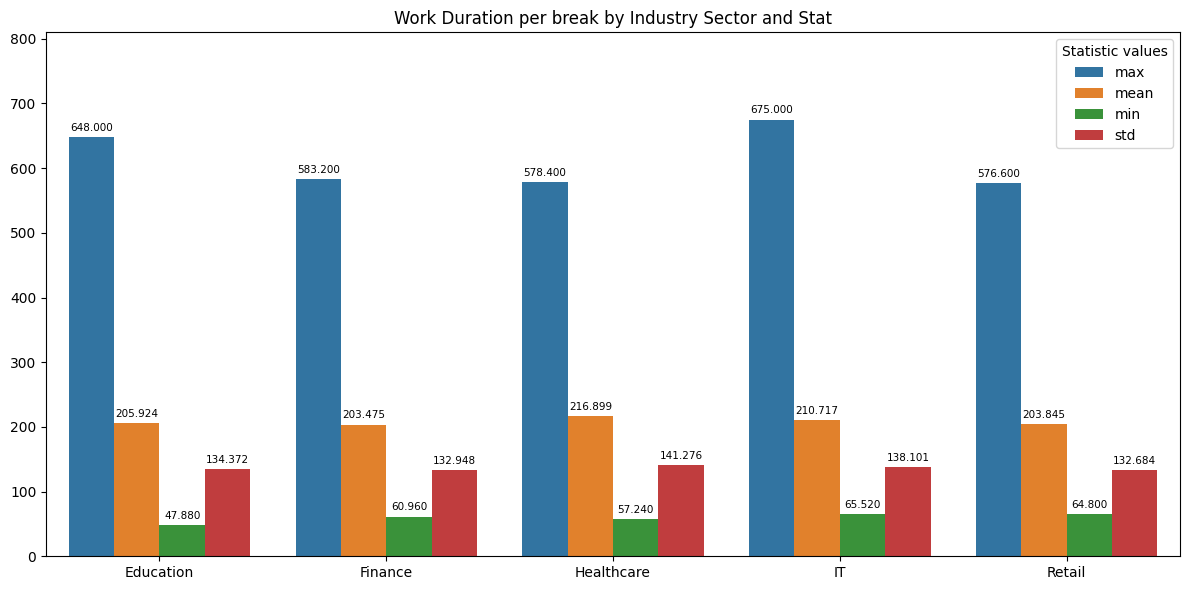

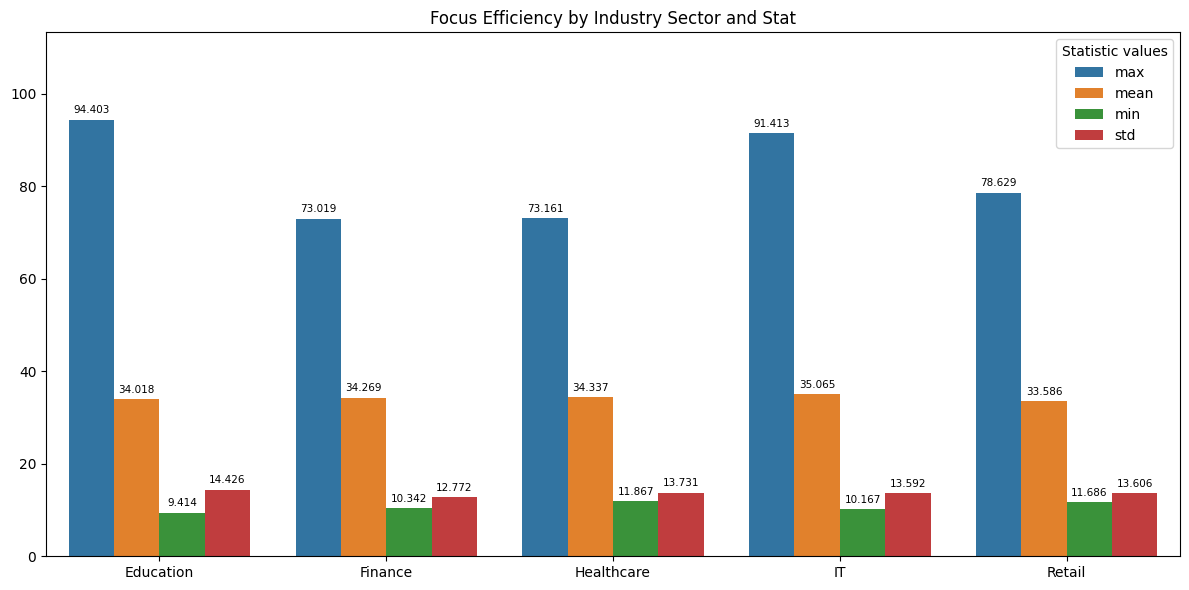

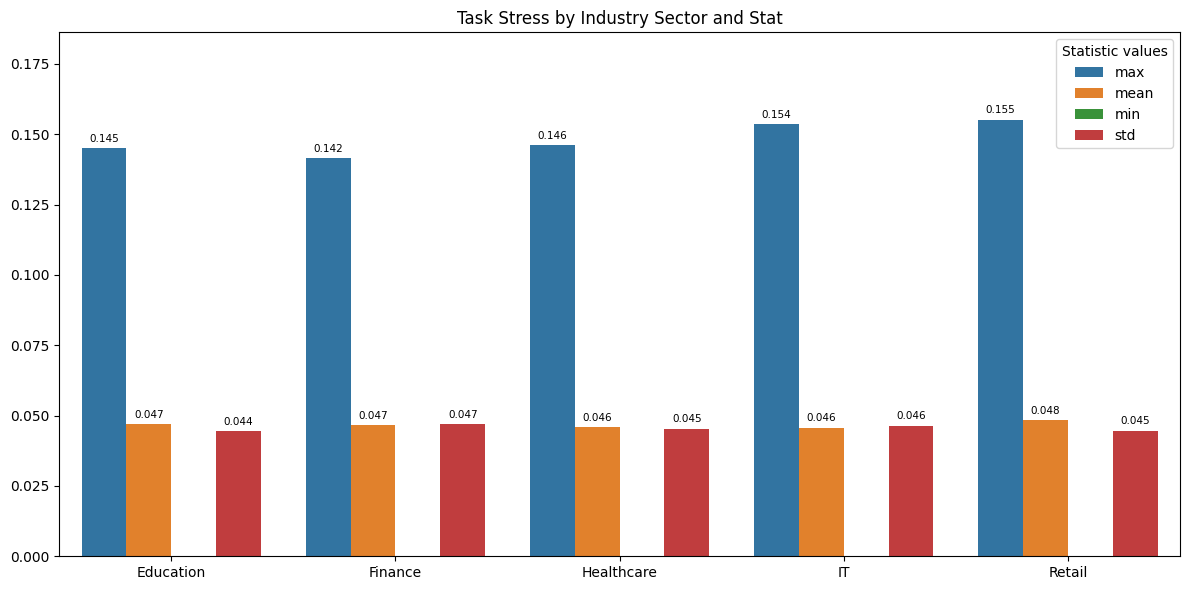

In [65]:
df_plot = work_intensity_stacked.reset_index()
ex_col = ['industry_sector', 'location_type']
col = [c for c in df2.columns if c not in ex_col]
cols_name = {
    'workspan_per_break': 'Work Duration per break',
    'focus_efficiency_ratio': 'Focus Efficiency',
    'task_stress': 'Task Stress',
    'calendar_scheduled_usage': 'Calendar Schedule Usage',
    'productivity_score': 'Productivity Score',
    'real_time_feedback_score': 'Real-time Feedback Score'
}
for c in col:
    plt.figure(figsize=(12, 6))
    max_val = df_plot[c].max()
    ax = sns.barplot(data=df_plot, x='industry_sector', y=c, hue='Stat')
    plt.title(f'{cols_name[c]} by Industry Sector and Stat')
    plt.xticks(rotation=0)
    plt.legend(title='Statistic values')
    ax.set_ylim(0, max_val*1.2)
    for bar in ax.patches:
        height = bar.get_height()
        if not np.isnan(height) and height > 0.01:
            ax.text(
                bar.get_x() + bar.get_width() / 2,
                height + max_val * 0.01,
                f'{height:.3f}',
                ha='center',
                va='bottom',
                fontsize=7.5
            )
    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.tight_layout()
    plt.show()


### 3. Correlation Analysis

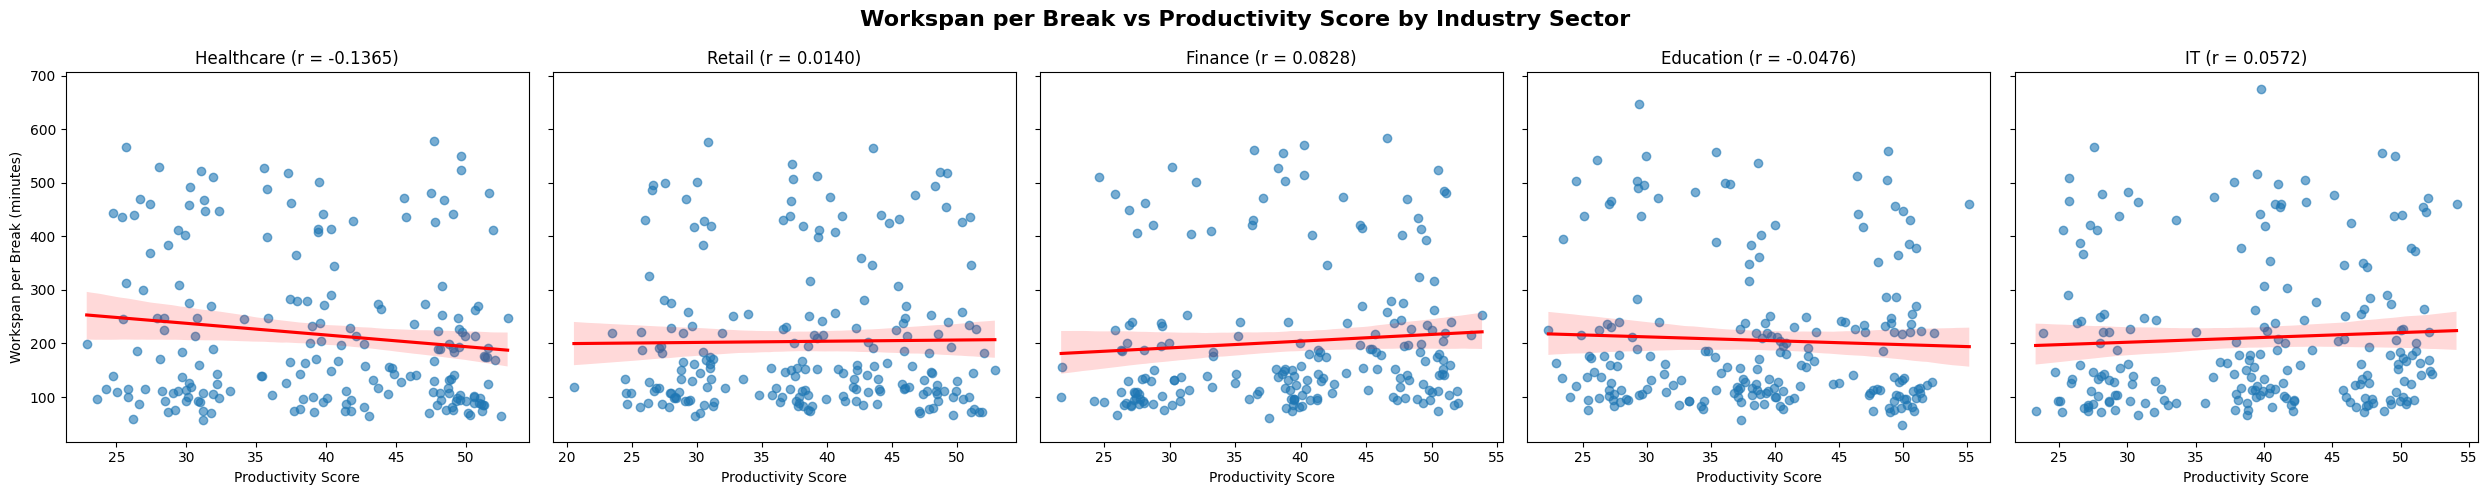

In [66]:
from scipy.stats import pearsonr


industry_sectors = df2['industry_sector'].dropna().unique()[:5]


fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('Workspan per Break vs Productivity Score by Industry Sector', fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df2[df2['industry_sector'] == sector].dropna(subset=['productivity_score', 'workspan_per_break'])

    # Compute Pearson correlation
    if len(subset) > 1:
        corr, _ = pearsonr(subset['productivity_score'], subset['workspan_per_break'])
    else:
        corr = float('nan')  # Avoid error if too few points

    # Plot
    sns.regplot(
        x='productivity_score',
        y='workspan_per_break',
        data=subset,
        ax=ax,
        scatter=True,
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    # Set title with correlation value
    ax.set_title(f"{sector} (r = {corr:.4f})")
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("Workspan per Break (minutes)" if ax == axes[0] else "")

plt.tight_layout()
plt.show()


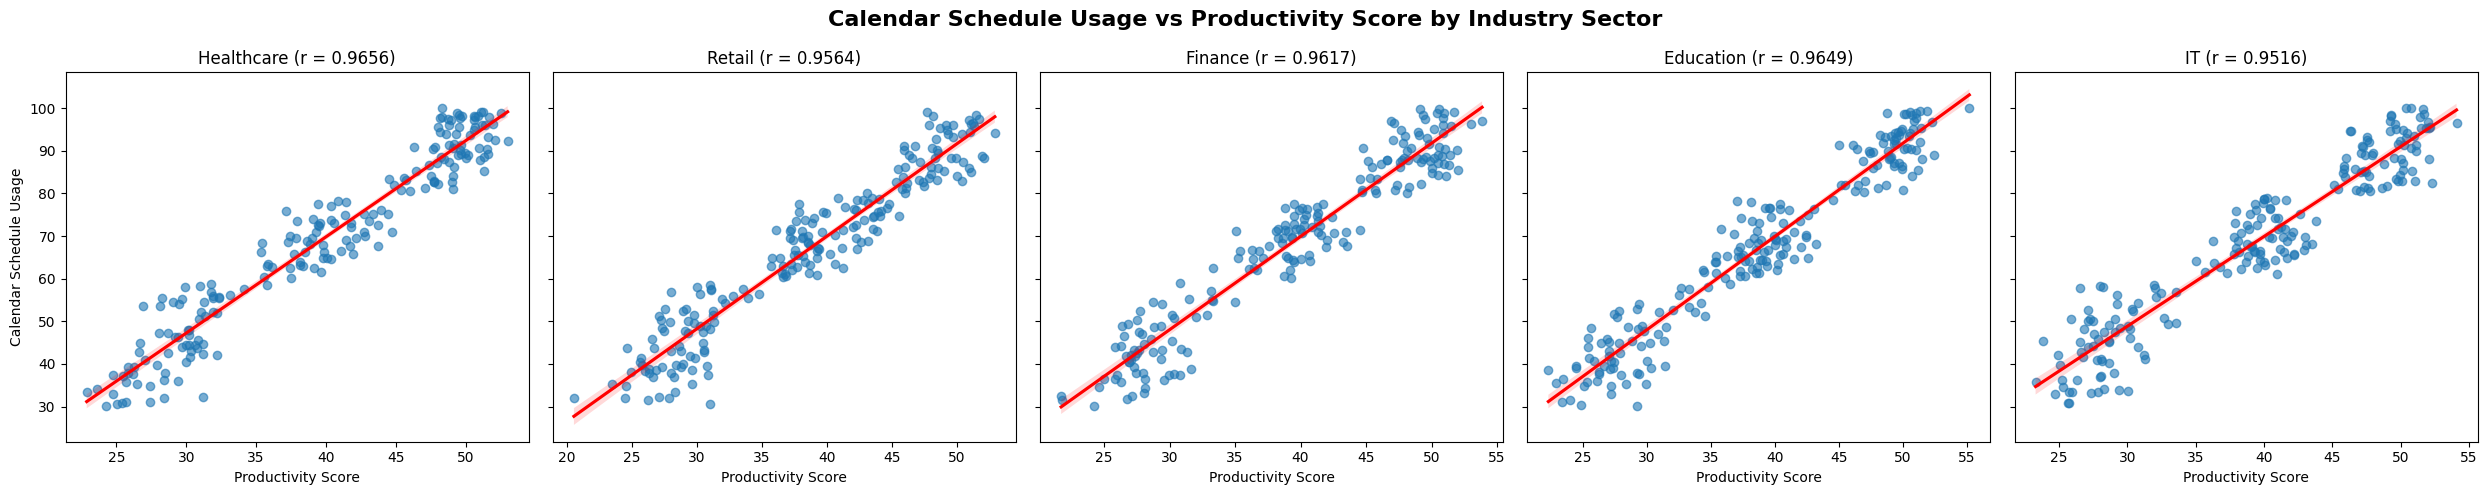

In [67]:
from scipy.stats import pearsonr


industry_sectors = df2['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('Calendar Schedule Usage vs Productivity Score by Industry Sector', fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df2[df2['industry_sector'] == sector].dropna(subset=['productivity_score', 'calendar_scheduled_usage'])

    # Compute Pearson correlation
    if len(subset) > 1:
        corr, _ = pearsonr(subset['productivity_score'], subset['calendar_scheduled_usage'])
    else:
        corr = float('nan')  # Avoid error if too few points

    # Plot
    sns.regplot(
        x='productivity_score',
        y='calendar_scheduled_usage',
        data=subset,
        ax=ax,
        scatter=True,
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    # Set title with correlation value
    ax.set_title(f"{sector} (r = {corr:.4f})")
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("Calendar Schedule Usage" if ax == axes[0] else "")

plt.tight_layout()
plt.show()


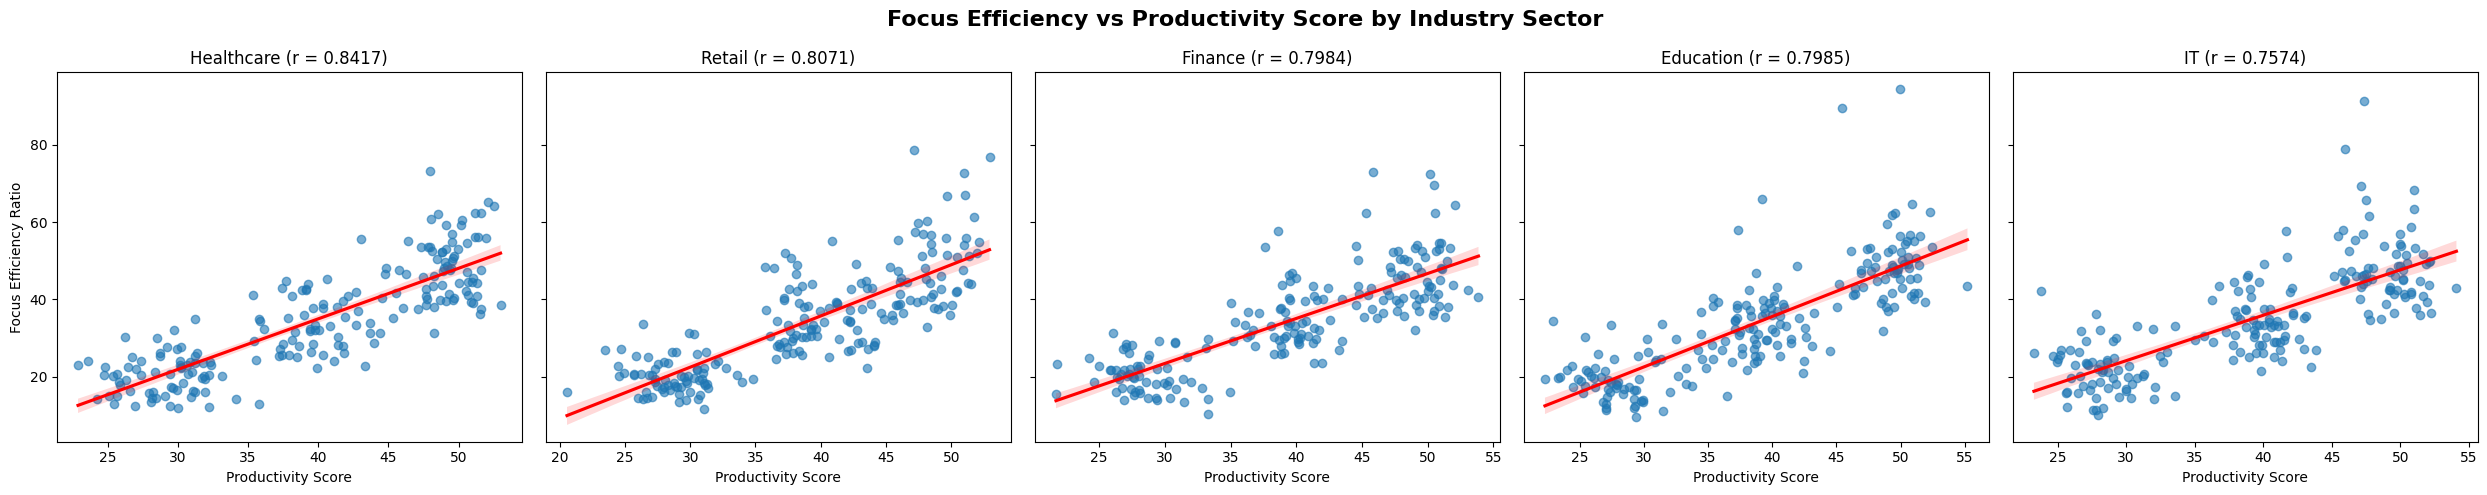

In [68]:
from scipy.stats import pearsonr


industry_sectors = df2['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('Focus Efficiency vs Productivity Score by Industry Sector', fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df2[df2['industry_sector'] == sector].dropna(subset=['productivity_score', 'focus_efficiency_ratio'])

    # Compute Pearson correlation
    if len(subset) > 1:
        corr, _ = pearsonr(subset['productivity_score'], subset['focus_efficiency_ratio'])
    else:
        corr = float('nan')  # Avoid error if too few points

    # Plot
    sns.regplot(
        x='productivity_score',
        y='focus_efficiency_ratio',
        data=subset,
        ax=ax,
        scatter=True,
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    # Set title with correlation value
    ax.set_title(f"{sector} (r = {corr:.4f})")
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("Focus Efficiency Ratio" if ax == axes[0] else "")

plt.tight_layout()
plt.show()


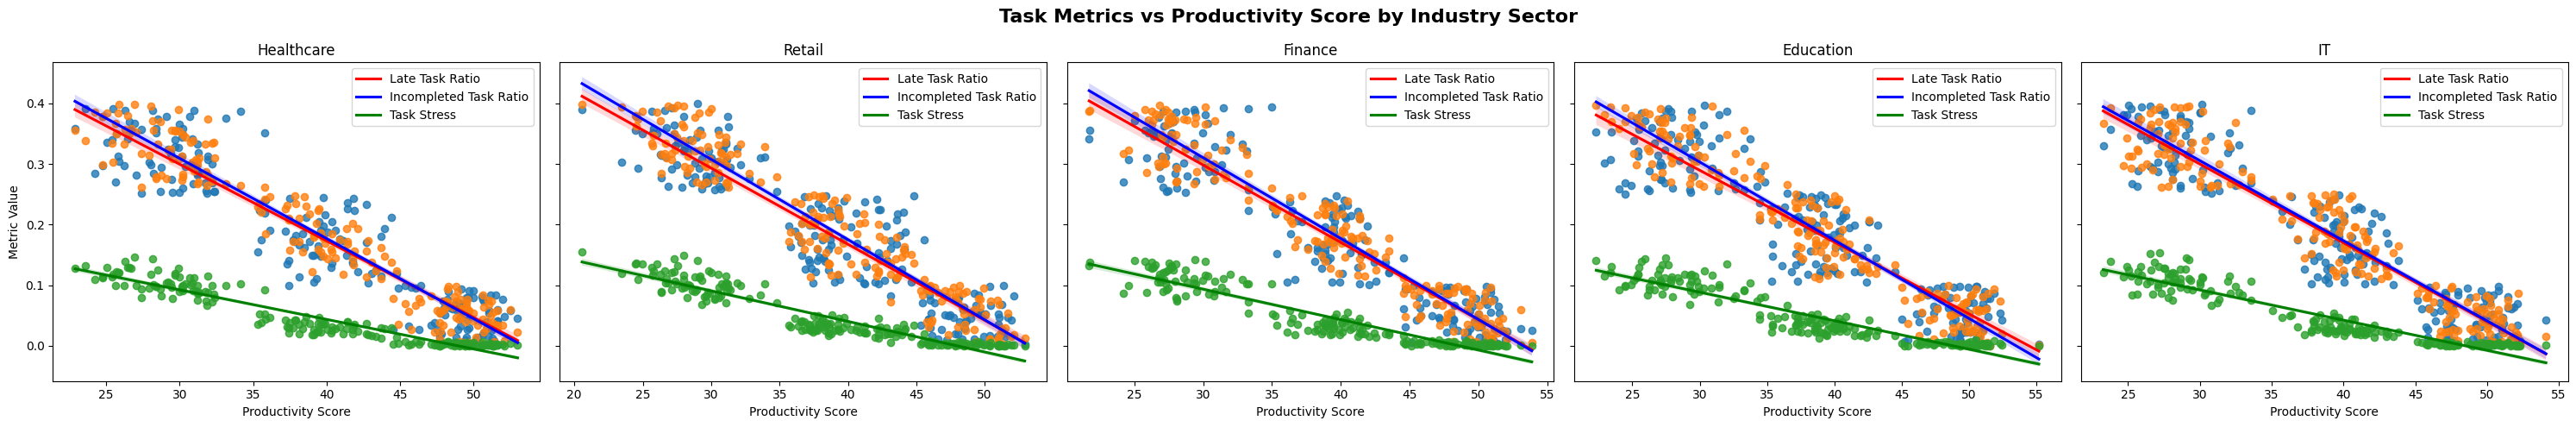

In [69]:
df2['late_task_ratio'] = df['late_task_ratio']
df2['incompleted_task_ratio'] = 1 - (df['task_completion_rate'] / 100)

industry_sectors = df2['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(30, 5), sharey=True)
fig.suptitle('Task Metrics vs Productivity Score by Industry Sector', fontsize=16, fontweight='bold')

colors = {
    'late_task_ratio': 'red',
    'incompleted_task_ratio': 'blue',
    'task_stress': 'green'
}

for ax, sector in zip(axes, industry_sectors):
    subset = df2[df2['industry_sector'] == sector].dropna(
        subset=['productivity_score', 'late_task_ratio', 'incompleted_task_ratio', 'task_stress']
    )

    for metric, color in colors.items():
        sns.regplot(
            x='productivity_score',
            y=metric,
            data=subset,
            ax=ax,
            scatter=True,
            line_kws={'color': color, 'label': metric.replace('_', ' ').title()}
        )

    ax.set_title(sector)
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("Metric Value" if ax == axes[0] else "")
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()


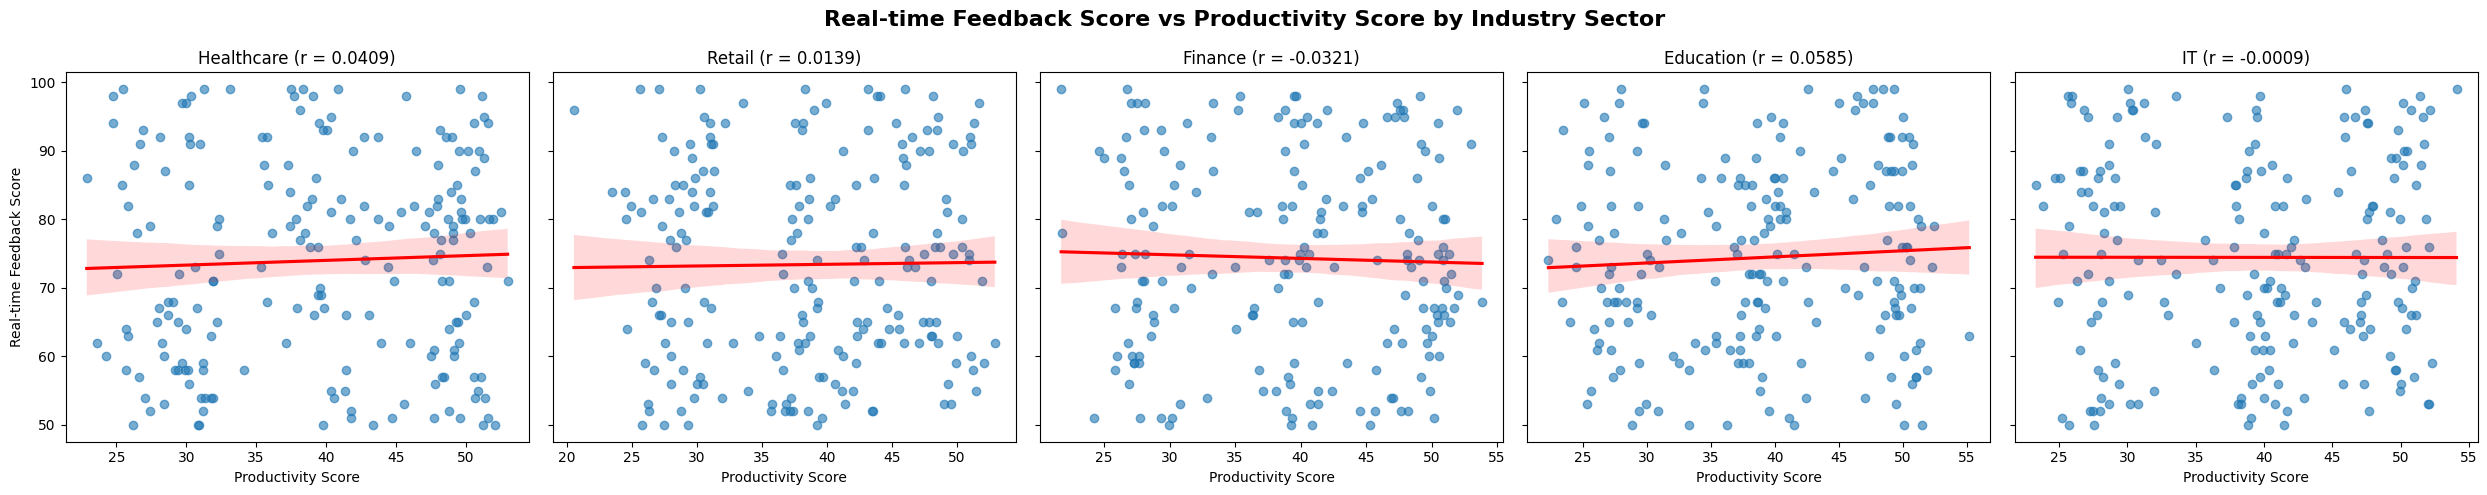

In [70]:
from scipy.stats import pearsonr

industry_sectors = df2['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('Real-time Feedback Score vs Productivity Score by Industry Sector', fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df2[df2['industry_sector'] == sector].dropna(subset=['productivity_score', 'real_time_feedback_score'])

    if len(subset) > 1:
        corr, _ = pearsonr(subset['productivity_score'], subset['real_time_feedback_score'])
    else:
        corr = float('nan')

    sns.regplot(
        x='productivity_score',
        y='real_time_feedback_score',
        data=subset,
        ax=ax,
        scatter=True,
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    # Set title with correlation value
    ax.set_title(f"{sector} (r = {corr:.4f})")
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("Real-time Feedback Score" if ax == axes[0] else "")

plt.tight_layout()
plt.show()


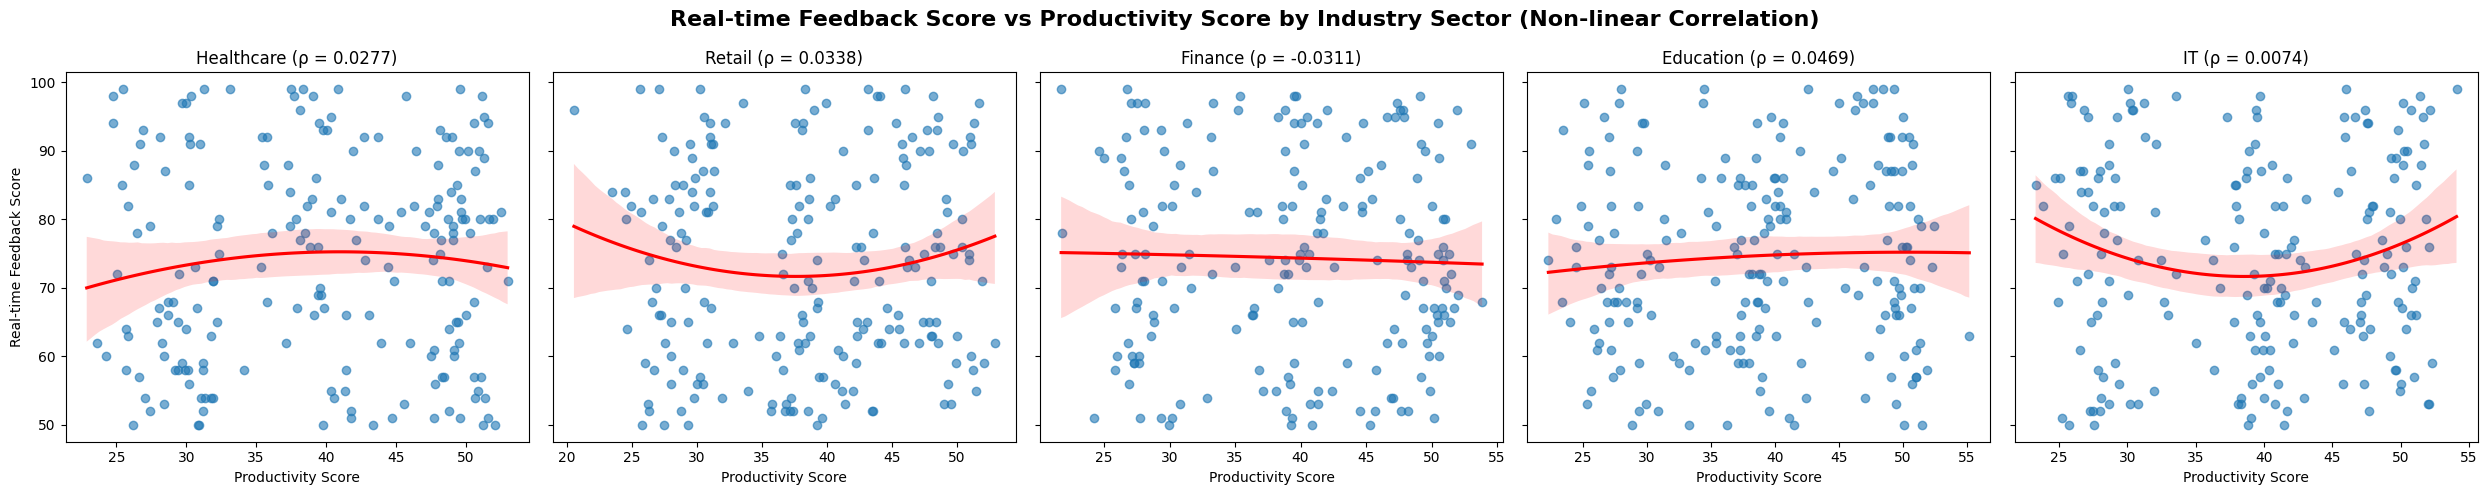

In [71]:
#Non-linear correlation
from scipy.stats import spearmanr

industry_sectors = df2['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('Real-time Feedback Score vs Productivity Score by Industry Sector (Non-linear Correlation)',
             fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df2[df2['industry_sector'] == sector].dropna(subset=['productivity_score', 'real_time_feedback_score'])

    # Compute Spearman correlation
    if len(subset) > 1:
        corr, _ = spearmanr(subset['productivity_score'], subset['real_time_feedback_score'])
    else:
        corr = float('nan')

    sns.regplot(
        x='productivity_score',
        y='real_time_feedback_score',
        data=subset,
        ax=ax,
        order=2,  # quadratic regression
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    ax.set_title(f"{sector} (ρ = {corr:.4f})")  # ρ -> the symbol for Spearman
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("Real-time Feedback Score" if ax == axes[0] else "")

plt.tight_layout()
plt.show()


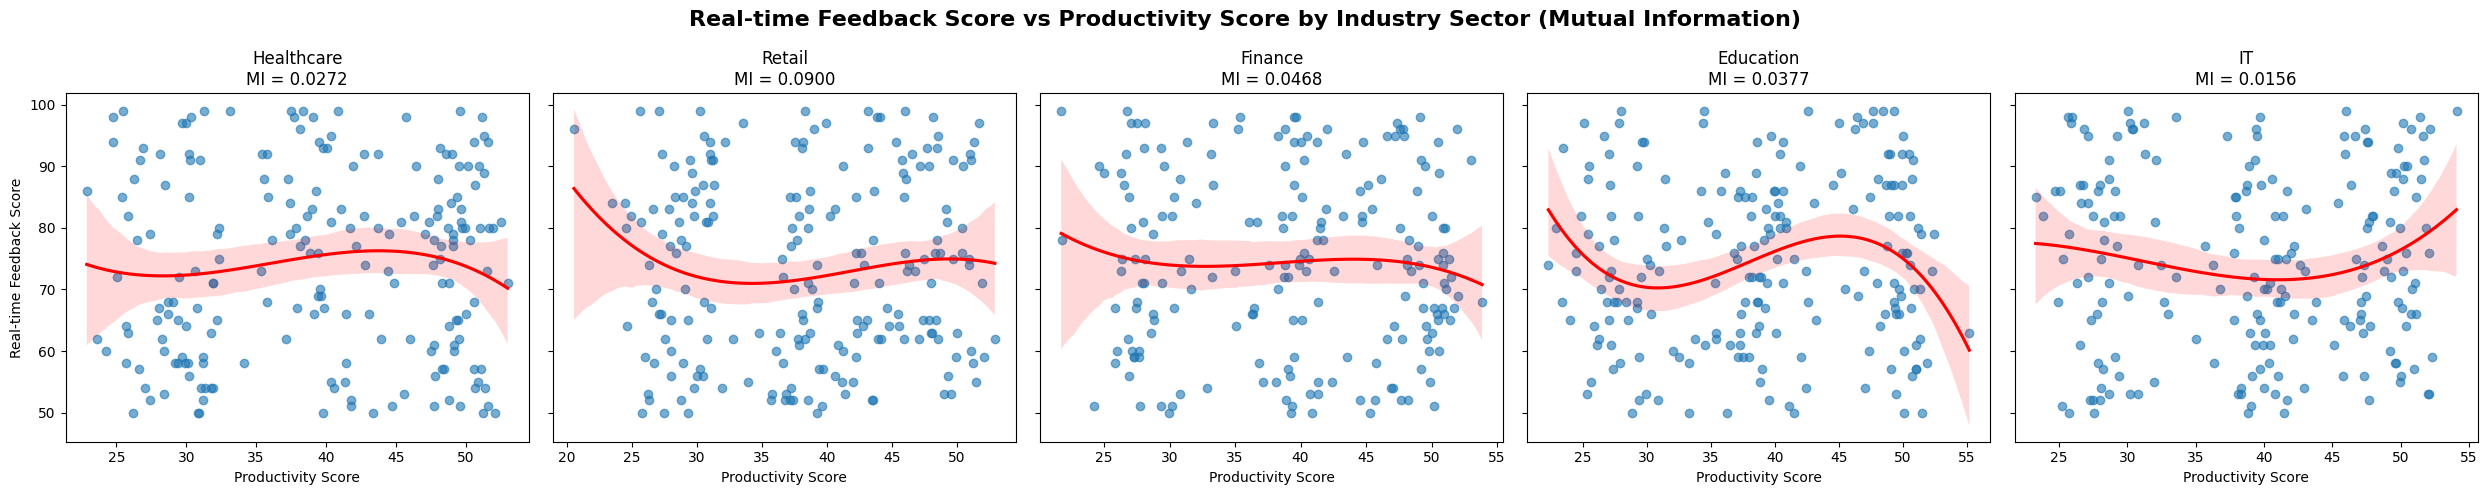

In [72]:
from sklearn.feature_selection import mutual_info_regression

industry_sectors = df2['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('Real-time Feedback Score vs Productivity Score by Industry Sector (Mutual Information)',
             fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df2[df2['industry_sector'] == sector].dropna(subset=['productivity_score', 'real_time_feedback_score'])

    if len(subset) > 1:
        X = subset[['productivity_score']].values
        y = subset['real_time_feedback_score'].values
        mi = mutual_info_regression(X, y, discrete_features=False)
        mi_score = mi[0]
    else:
        mi_score = float('nan')

    sns.regplot(
        x='productivity_score',
        y='real_time_feedback_score',
        data=subset,
        ax=ax,
        order=3,
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    ax.set_title(f"{sector}\nMI = {mi_score:.4f}")
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("Real-time Feedback Score" if ax == axes[0] else "")

plt.tight_layout()
plt.show()


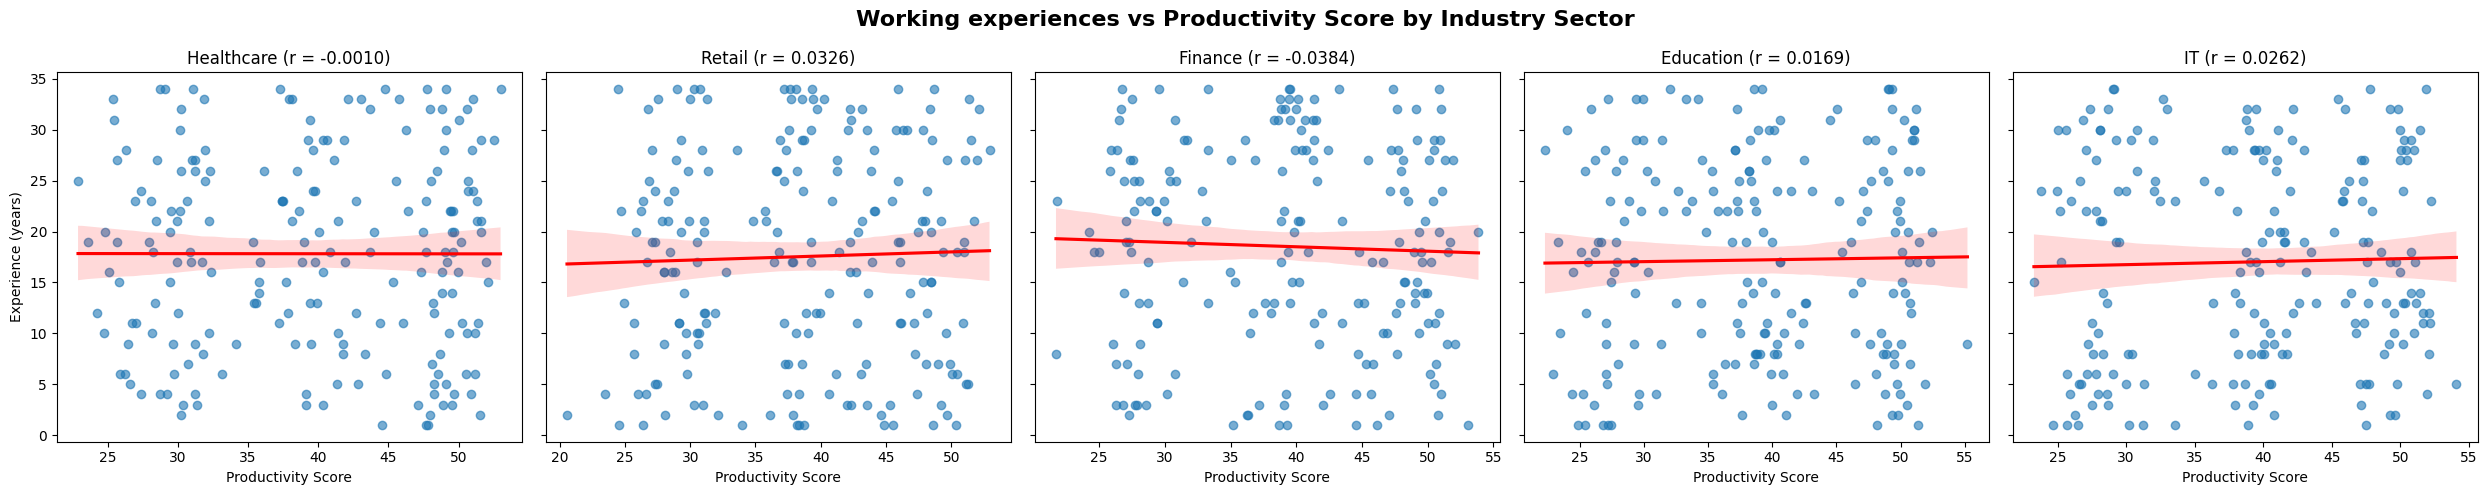

In [73]:
from scipy.stats import pearsonr

df2['experience_years'] = df['experience_years']
industry_sectors = df2['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('Working experiences vs Productivity Score by Industry Sector', fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df2[df2['industry_sector'] == sector].dropna(subset=['productivity_score', 'experience_years'])

    if len(subset) > 1:
        corr, _ = pearsonr(subset['productivity_score'], subset['experience_years'])
    else:
        corr = float('nan')

    # Plot
    sns.regplot(
        x='productivity_score',
        y='experience_years',
        data=subset,
        ax=ax,
        scatter=True,
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    ax.set_title(f"{sector} (r = {corr:.4f})")
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("Experience (years)" if ax == axes[0] else "")

plt.tight_layout()
plt.show()


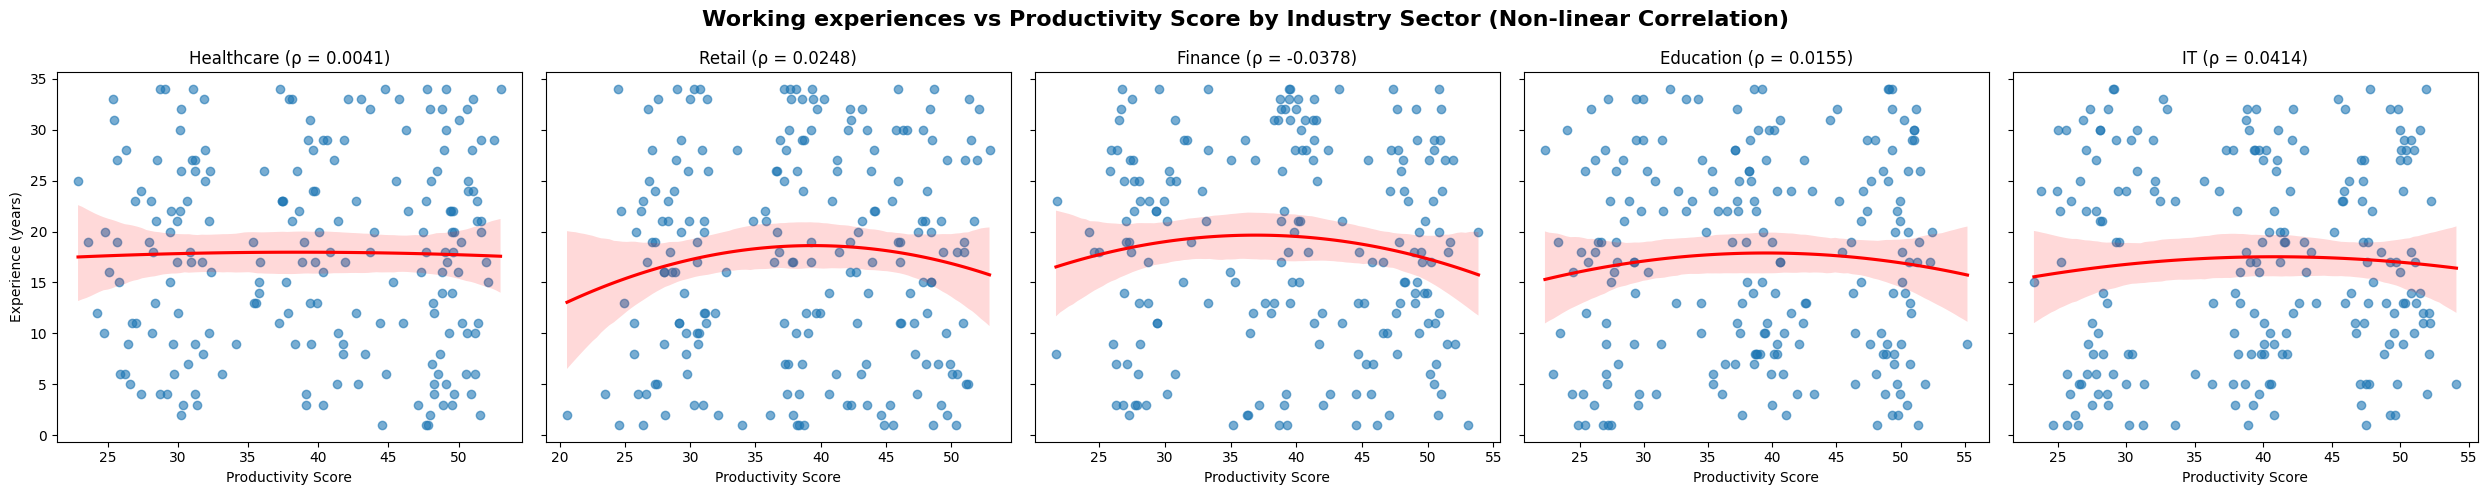

In [74]:
#Non-linear correlation
from scipy.stats import spearmanr

industry_sectors = df2['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('Working experiences vs Productivity Score by Industry Sector (Non-linear Correlation)',
             fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df2[df2['industry_sector'] == sector].dropna(subset=['productivity_score', 'experience_years'])

    if len(subset) > 1:
        corr, _ = spearmanr(subset['productivity_score'], subset['experience_years'])
    else:
        corr = float('nan')

    sns.regplot(
        x='productivity_score',
        y='experience_years',
        data=subset,
        ax=ax,
        order=2,  # quadratic regression
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    # Set title with correlation value
    ax.set_title(f"{sector} (ρ = {corr:.4f})")
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("Experience (years)" if ax == axes[0] else "")

plt.tight_layout()
plt.show()


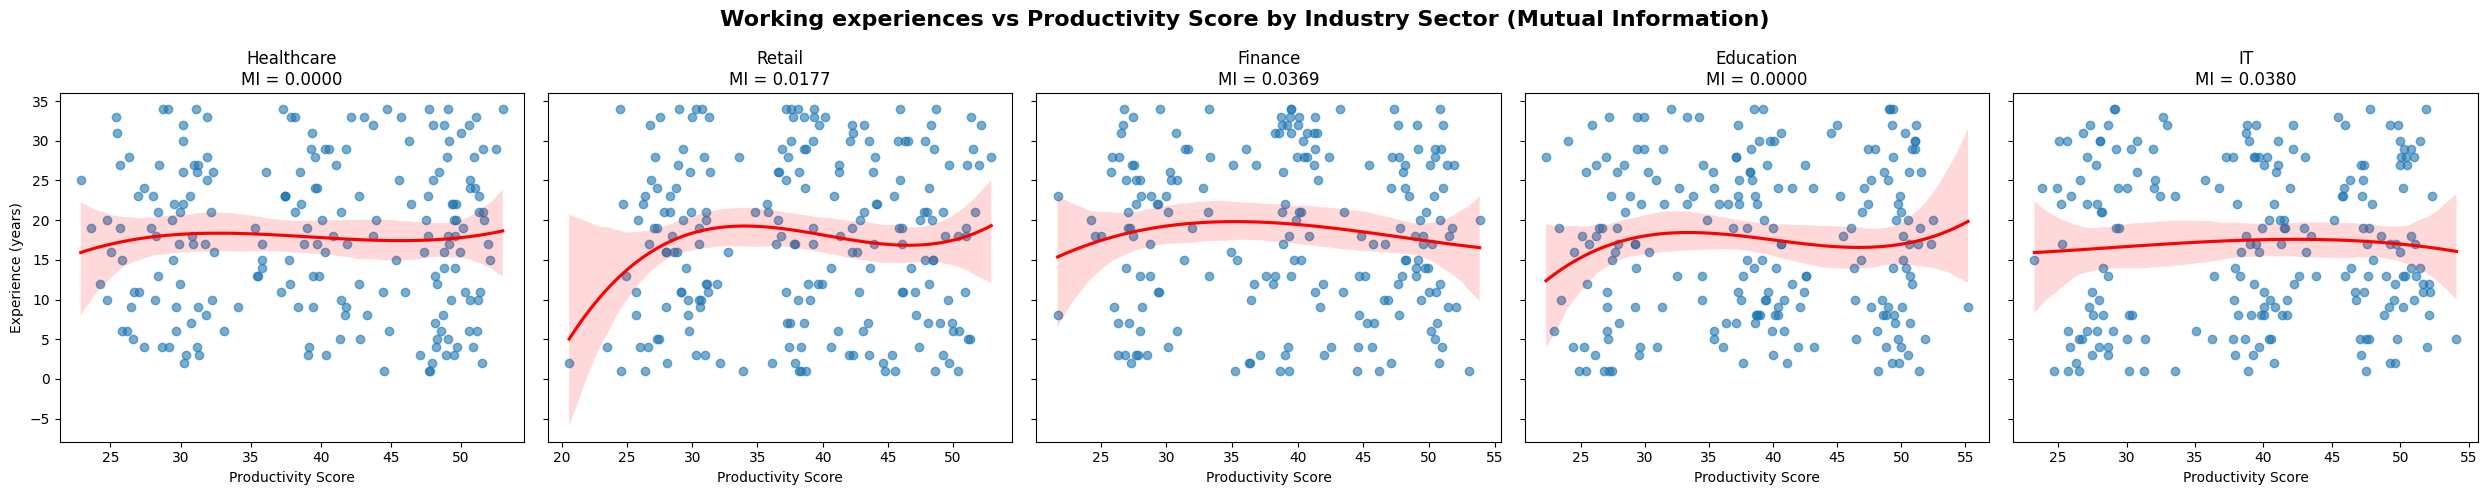

In [75]:
from sklearn.feature_selection import mutual_info_regression

industry_sectors = df2['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('Working experiences vs Productivity Score by Industry Sector (Mutual Information)',
             fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df2[df2['industry_sector'] == sector].dropna(subset=['productivity_score', 'experience_years'])

    if len(subset) > 1:
        X = subset[['productivity_score']].values
        y = subset['experience_years'].values
        mi = mutual_info_regression(X, y, discrete_features=False)
        mi_score = mi[0]
    else:
        mi_score = float('nan')

    sns.regplot(
        x='productivity_score',
        y='experience_years',
        data=subset,
        ax=ax,
        order=3,
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    ax.set_title(f"{sector}\nMI = {mi_score:.4f}")
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("Experience (years)" if ax == axes[0] else "")

plt.tight_layout()
plt.show()


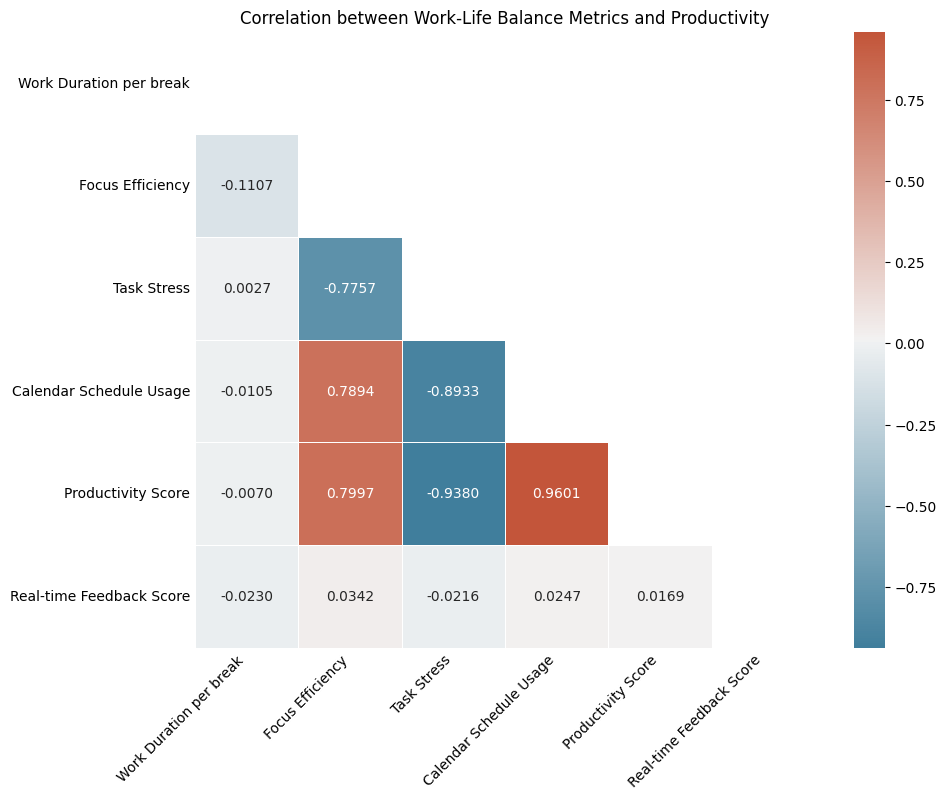

In [76]:
# Correlation matrix
corr_cols = {
    'workspan_per_break': 'Work Duration per break',
    'focus_efficiency_ratio': 'Focus Efficiency',
    'task_stress': 'Task Stress',
    'calendar_scheduled_usage': 'Calendar Schedule Usage',
    'productivity_score': 'Productivity Score',
    'real_time_feedback_score': 'Real-time Feedback Score'
}
df_corr = df2[list(corr_cols.keys())].rename(columns=corr_cols)
corr = df_corr.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask
ax = sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, fmt=".4f", linewidths=.5 )

# Remove the first label on y-axis and the last on x-axis
xticks = ax.get_xticklabels()
yticks = ax.get_yticklabels()

ax.tick_params(axis='both', length=0)
ax.set_xticklabels(xticks, rotation=45, ha='right')
ax.set_yticklabels(yticks)

plt.title('Correlation between Work-Life Balance Metrics and Productivity')
plt.show()

## 2.4 AI-related metric

### 1 Create DataFrame

In [77]:
# Load data
df3 = pd.DataFrame()
df3['location_type'] = df['location_type']
df3['industry_sector'] =  df['industry_sector']
df3['productivity_score'] = df['productivity_score']
df3['AI_assisted_planning_per_work_hour'] = df['AI_assisted_planning'] / df['average_daily_work_hours']
df3['automated_task_count_per_work_hour'] = df['automated_task_count'] / df['average_daily_work_hours']
df3['tool_usage_frequency_per_work_hour'] = df['tool_usage_frequency'] / df['average_daily_work_hours']
df3

location_type industry_sector  productivity_score  \
0         Village      Healthcare               32.31   
1            City      Healthcare               41.09   
2         Village          Retail               25.69   
3         Village         Finance               31.98   
4            City       Education               48.19   
..            ...             ...                 ...   
995          Town          Retail               48.53   
996          Town          Retail               24.47   
997       Village              IT               47.63   
998       Village       Education               51.34   
999          City         Finance               39.49   

     AI_assisted_planning_per_work_hour  automated_task_count_per_work_hour  \
0                              0.000000                            1.744966   
1                              0.101833                            0.101833   
2                              0.000000                            0.542005   
3                              0.119474                            1.075269   
4                              0.000000                            1.065246   
..                                  ...                                 ...   
995                            0.137741                            0.137741   
996                            0.000000                            0.747384   
997                            0.000000                            1.963534   
998                            0.000000                            0.258065   
999                            0.000000                            1.597444   

     tool_usage_frequency_per_work_hour  
0                              2.550336  
1                              0.509165  
2                              0.542005  
3                              2.031063  
4                              1.864181  
..                                  ...  
995                            0.413223  
996                            2.242152  
997                            1.683029  
998                            2.451613  
999                            2.715655  

[1000 rows x 6 columns]

In [78]:
ex_col = ['industry_sector', 'location_type']
col = [c for c in df3.columns if c not in ex_col]
tech_adoption = pd.pivot_table(df3, index='industry_sector', values=col, aggfunc=['max', 'min', 'mean', 'std'])
tech_adoption_stacked = tech_adoption.stack(level=0)

tech_adoption_stacked.index.set_names(['industry_sector', 'Stat'], inplace=True)
tech_adoption_stacked

/tmp/ipython-input-78-4040970009.py:4: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  tech_adoption_stacked = tech_adoption.stack(level=0)


AI_assisted_planning_per_work_hour  \
industry_sector Stat                                       
Education       max                             0.252525   
                mean                            0.069904   
                min                             0.000000   
                std                             0.070815   
Finance         max                             0.205339   
                mean                            0.068500   
                min                             0.000000   
                std                             0.069356   
Healthcare      max                             0.209644   
                mean                            0.074806   
                min                             0.000000   
                std                             0.070029   
IT              max                             0.277008   
                mean                            0.062110   
                min                             0.000000   
                std                             0.069161   
Retail          max                             0.231481   
                mean                            0.068702   
                min                             0.000000   
                std                             0.072014   

                      automated_task_count_per_work_hour  productivity_score  \
industry_sector Stat                                                           
Education       max                             3.500000           55.200000   
                mean                            0.980611           38.830148   
                min                             0.000000           22.310000   
                std                             0.624772            8.817496   
Finance         max                             2.874743           53.860000   
                mean                            0.975339           39.332396   
                min                             0.000000           21.720000   
                std                             0.621850            8.757196   
Healthcare      max                             2.838428           52.990000   
                mean                            0.998677           39.531508   
                min                             0.000000           22.880000   
                std                             0.659118            8.834943   
IT              max                             2.584493           54.100000   
                mean                            0.932672           39.316601   
                min                             0.000000           23.270000   
                std                             0.588274            8.761856   
Retail          max                             2.788845           52.930000   
                mean                            0.953061           38.412118   
                min                             0.000000           20.560000   
                std                             0.613579            8.283304   

                      tool_usage_frequency_per_work_hour  
industry_sector Stat                                      
Education       max                             4.260652  
                mean                            1.223347  
                min                             0.000000  
                std                             0.887822  
Finance         max                             3.901437  
                mean                            1.317136  
                min                             0.000000  
                std                             0.872854  
Healthcare      max                             3.930131  
                mean                            1.314535  
                min                             0.000000  
                std                             0.807365  
IT              max                             3.837953  
                mean                            1.29366

### 2. Plot Graph

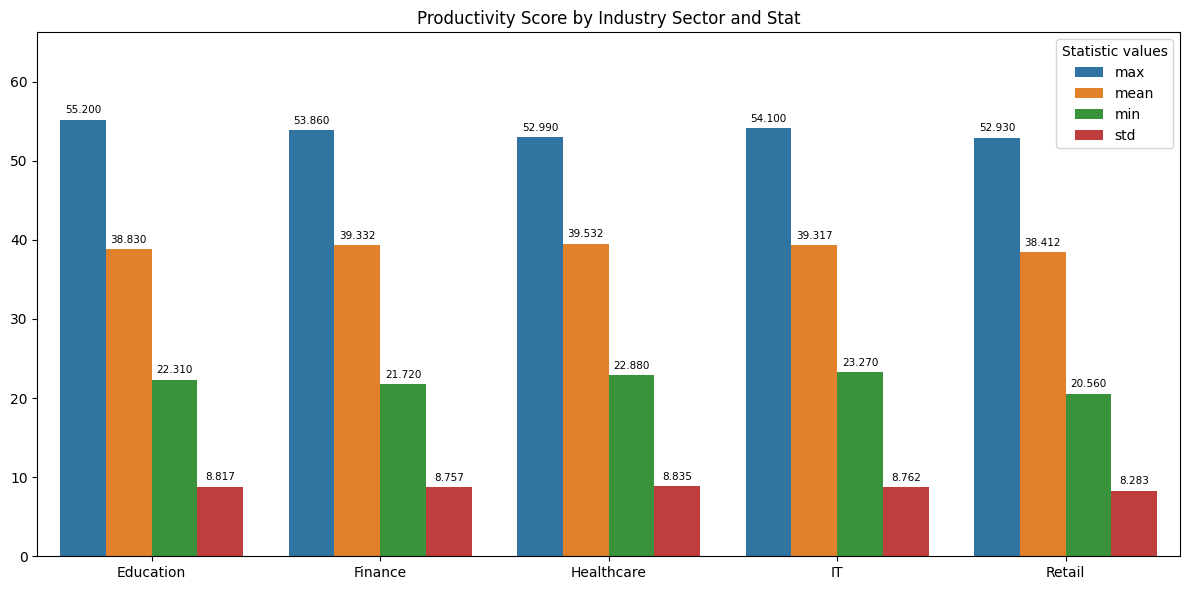

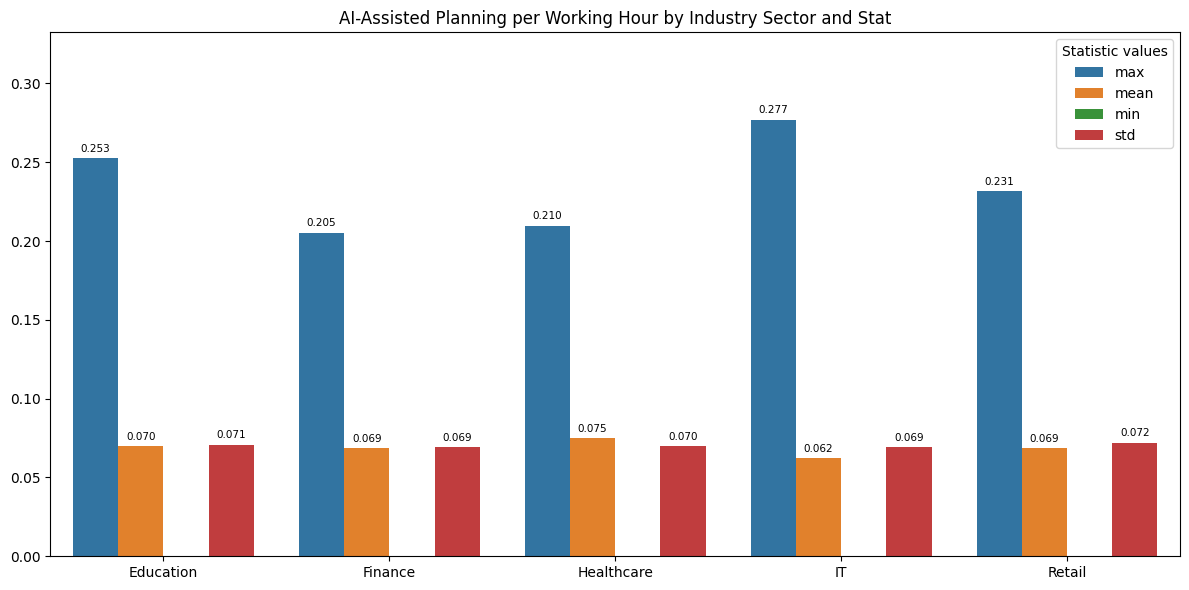

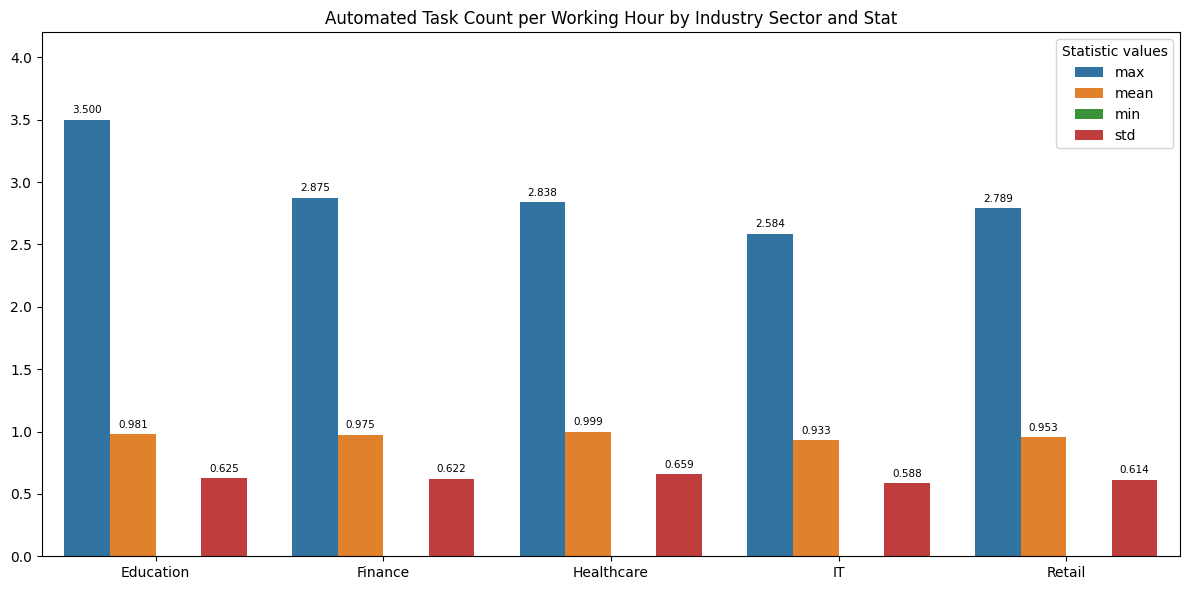

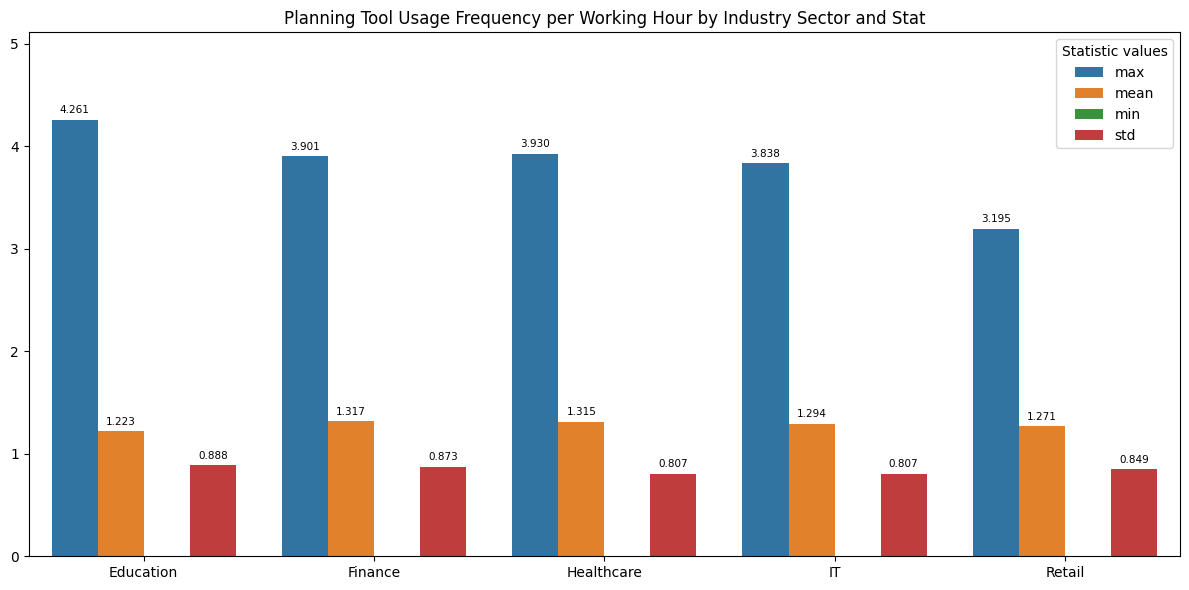

In [79]:
df_plot = tech_adoption_stacked.reset_index()
ex_col = ['industry_sector', 'location_type']
col = [c for c in df3.columns if c not in ex_col]
cols_name = {
    'AI_assisted_planning_per_work_hour': 'AI-Assisted Planning per Working Hour',
    'automated_task_count_per_work_hour': 'Automated Task Count per Working Hour',
    'tool_usage_frequency_per_work_hour': 'Planning Tool Usage Frequency per Working Hour',
    'productivity_score': 'Productivity Score',
}

for c in col:
    plt.figure(figsize=(12, 6))
    max_val = df_plot[c].max()

    ax = sns.barplot(data=df_plot, x='industry_sector', y=c, hue='Stat')
    plt.title(f'{cols_name.get(c, c)} by Industry Sector and Stat')
    plt.xticks(rotation=0)
    plt.legend(title='Statistic values')

    ax.set_ylim(0, max_val * 1.2)

    for bar in ax.patches:
        height = bar.get_height()
        if not np.isnan(height) and height > 0:  # Only label bars with actual height > 0
            label = f'{height:.3f}' if height > 0.001 else '0'
            y_pos = height + max_val * 0.01

            ax.text(
                bar.get_x() + bar.get_width() / 2,
                y_pos,
                label,
                ha='center',
                va='bottom',
                fontsize=7.5
            )

    ax.set_xlabel('')
    ax.set_ylabel('')
    plt.tight_layout()
    plt.show()

### 3. Correlation Analysis

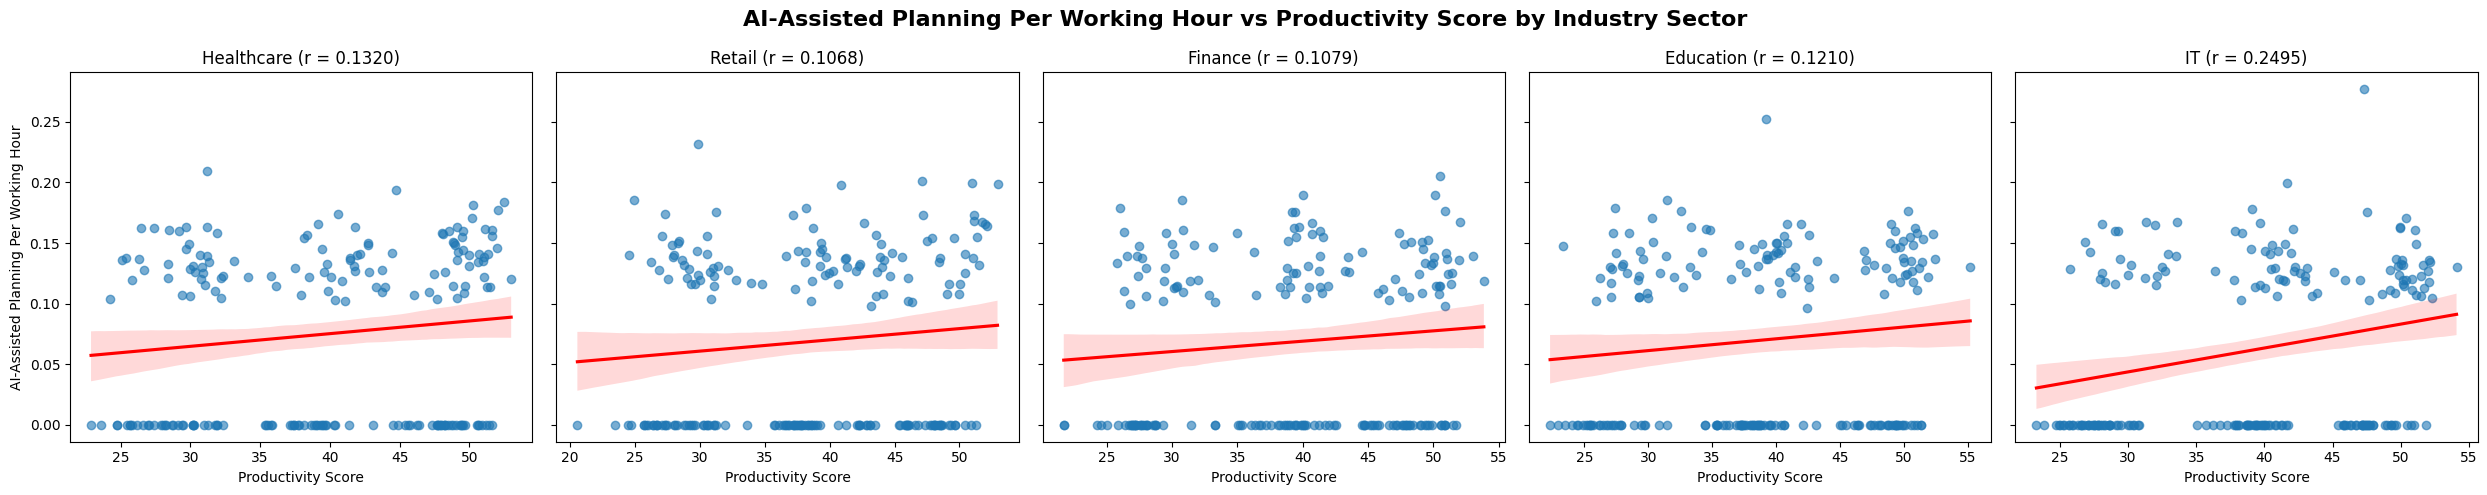

In [80]:
from scipy.stats import pearsonr

industry_sectors = df3['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('AI-Assisted Planning Per Working Hour vs Productivity Score by Industry Sector', fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df3[df3['industry_sector'] == sector].dropna(subset=['productivity_score', 'AI_assisted_planning_per_work_hour'])

    if len(subset) > 1:
        corr, _ = pearsonr(subset['productivity_score'], subset['AI_assisted_planning_per_work_hour'])
    else:
        corr = float('nan')

    sns.regplot(
        x='productivity_score',
        y='AI_assisted_planning_per_work_hour',
        data=subset,
        ax=ax,
        scatter=True,
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    ax.set_title(f"{sector} (r = {corr:.4f})")
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("AI-Assisted Planning Per Working Hour" if ax == axes[0] else "")

plt.tight_layout()
plt.show()

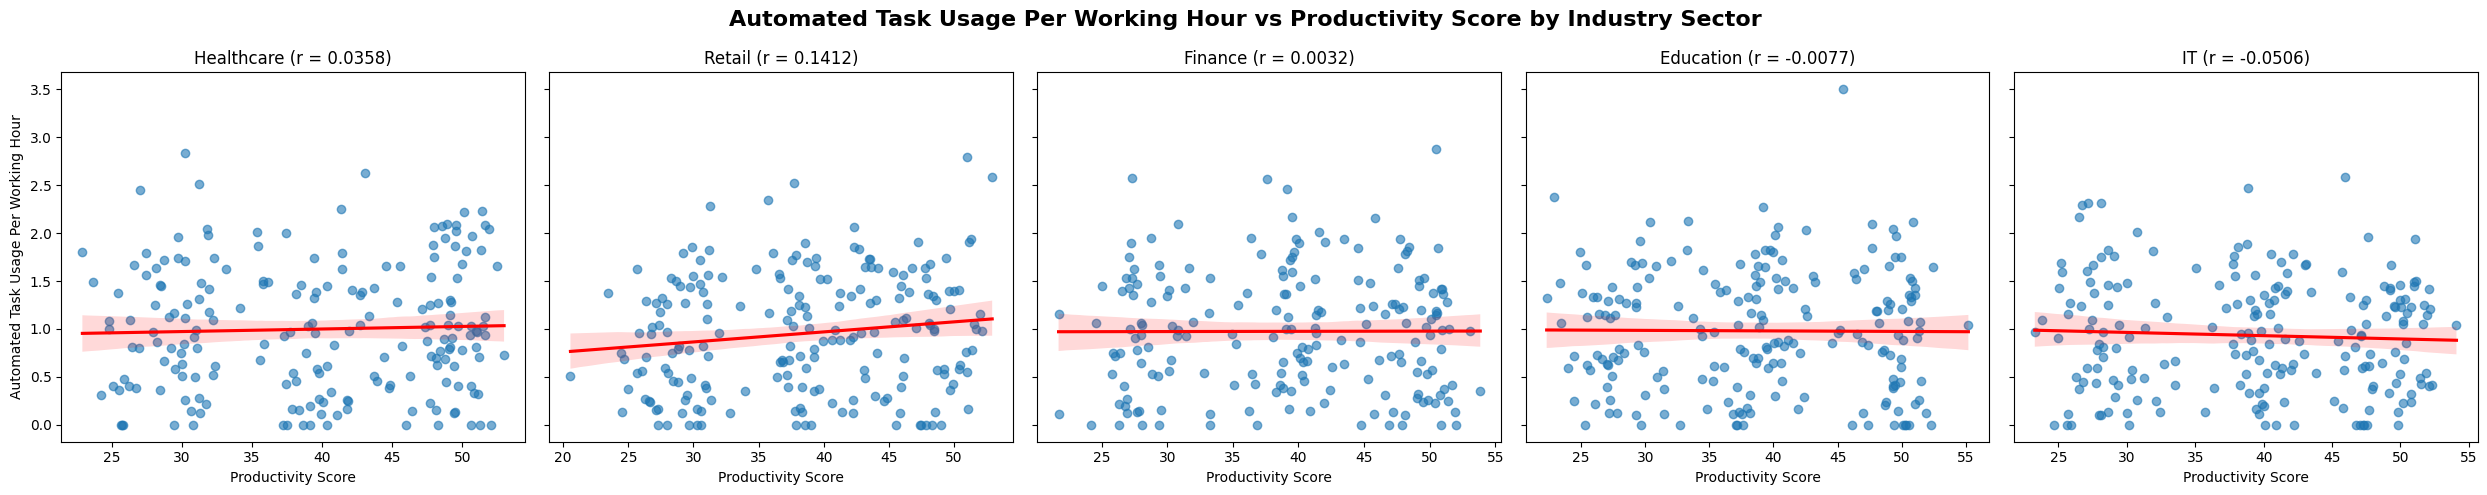

In [81]:
from scipy.stats import pearsonr

industry_sectors = df3['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('Automated Task Usage Per Working Hour vs Productivity Score by Industry Sector', fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df3[df3['industry_sector'] == sector].dropna(subset=['productivity_score', 'automated_task_count_per_work_hour'])

    if len(subset) > 1:
        corr, _ = pearsonr(subset['productivity_score'], subset['automated_task_count_per_work_hour'])
    else:
        corr = float('nan')

    sns.regplot(
        x='productivity_score',
        y='automated_task_count_per_work_hour',
        data=subset,
        ax=ax,
        scatter=True,
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    ax.set_title(f"{sector} (r = {corr:.4f})")
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("Automated Task Usage Per Working Hour" if ax == axes[0] else "")

plt.tight_layout()
plt.show()


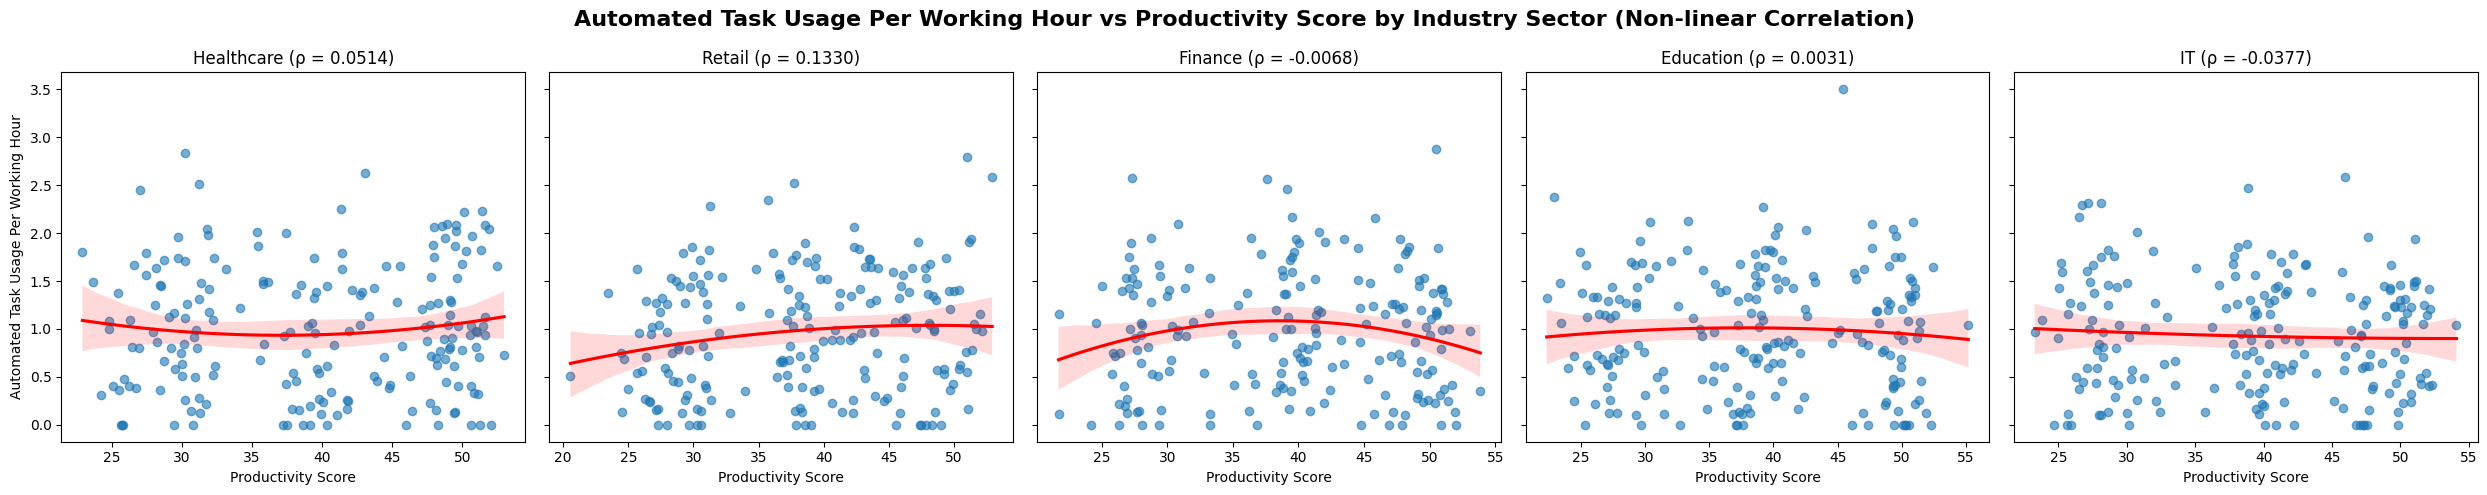

In [82]:
#Non-linear correlation
from scipy.stats import spearmanr

industry_sectors = df3['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('Automated Task Usage Per Working Hour vs Productivity Score by Industry Sector (Non-linear Correlation)',
             fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df3[df3['industry_sector'] == sector].dropna(subset=['productivity_score', 'automated_task_count_per_work_hour'])

    if len(subset) > 1:
        corr, _ = spearmanr(subset['productivity_score'], subset['automated_task_count_per_work_hour'])
    else:
        corr = float('nan')

    sns.regplot(
        x='productivity_score',
        y='automated_task_count_per_work_hour',
        data=subset,
        ax=ax,
        order=2,  # quadratic regression
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    ax.set_title(f"{sector} (ρ = {corr:.4f})")
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("Automated Task Usage Per Working Hour" if ax == axes[0] else "")

plt.tight_layout()
plt.show()


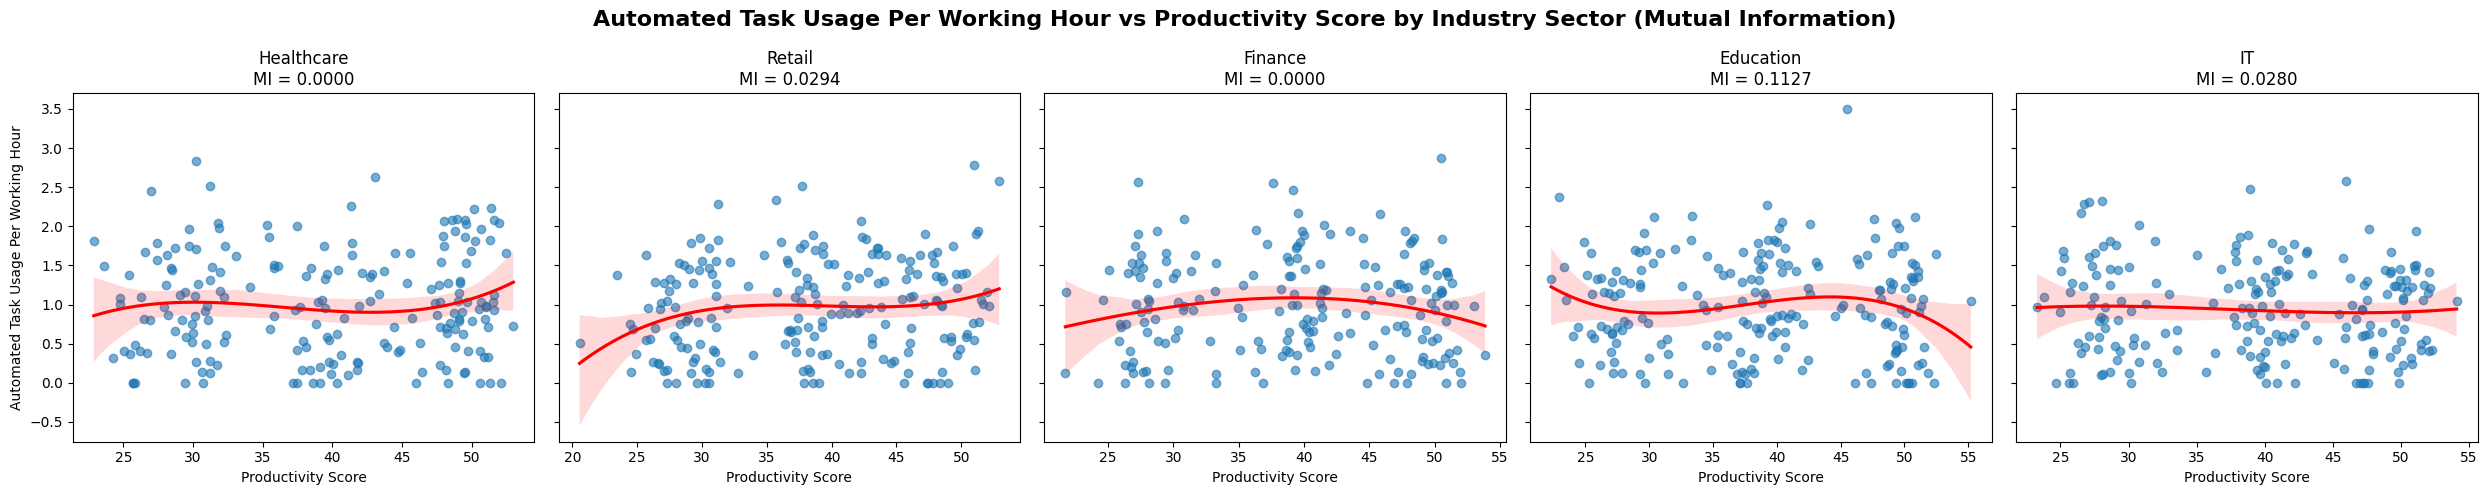

In [83]:
from sklearn.feature_selection import mutual_info_regression

industry_sectors = df3['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('Automated Task Usage Per Working Hour vs Productivity Score by Industry Sector (Mutual Information)',
             fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df3[df3['industry_sector'] == sector].dropna(subset=['productivity_score', 'automated_task_count_per_work_hour'])

    if len(subset) > 1:
        X = subset[['productivity_score']].values
        y = subset['automated_task_count_per_work_hour'].values
        mi = mutual_info_regression(X, y, discrete_features=False)
        mi_score = mi[0]
    else:
        mi_score = float('nan')

    sns.regplot(
        x='productivity_score',
        y='automated_task_count_per_work_hour',
        data=subset,
        ax=ax,
        order=3,
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    ax.set_title(f"{sector}\nMI = {mi_score:.4f}")
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("Automated Task Usage Per Working Hour" if ax == axes[0] else "")

plt.tight_layout()
plt.show()

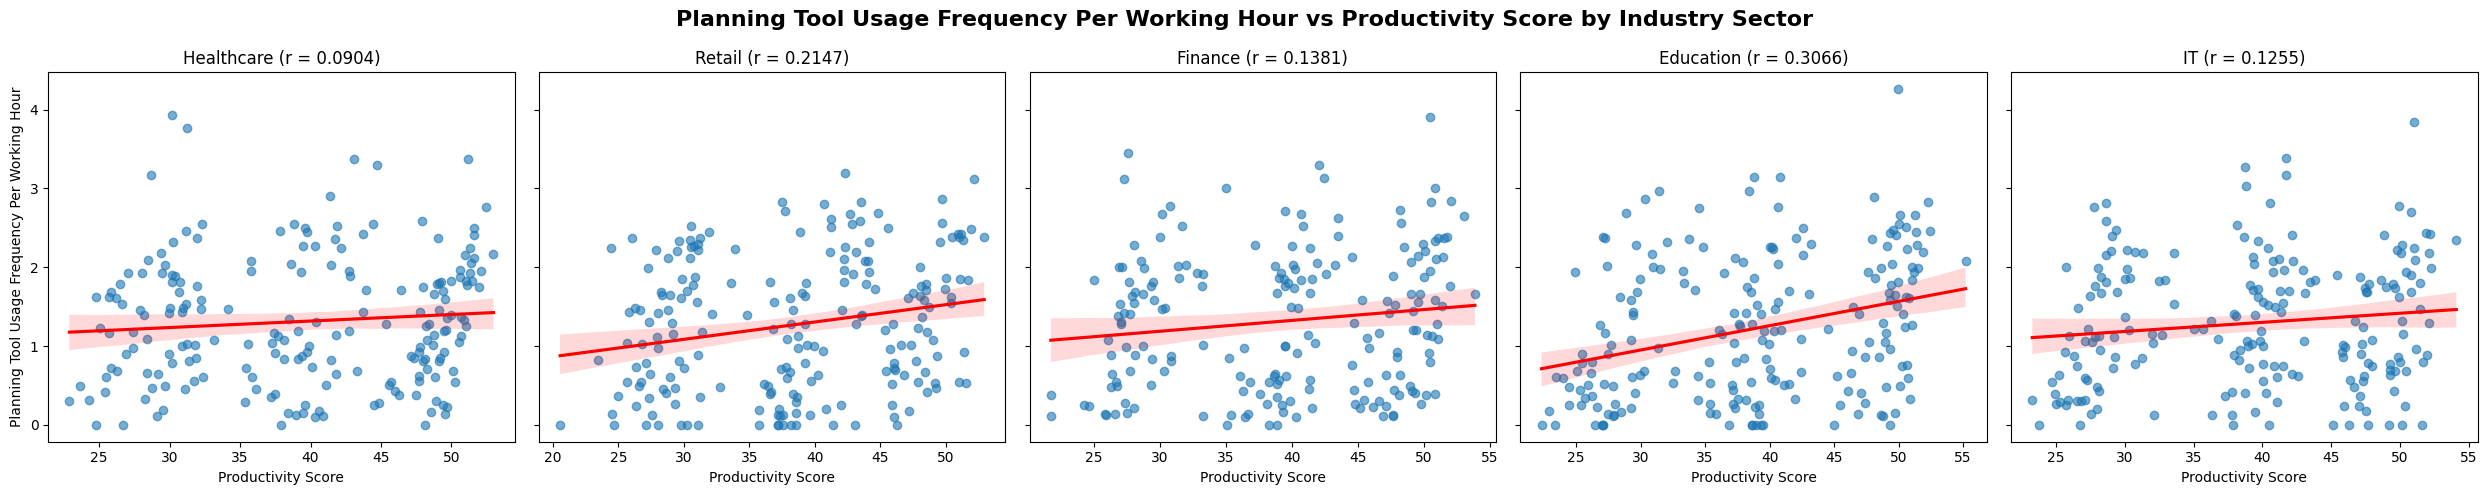

In [84]:
from scipy.stats import pearsonr

industry_sectors = df3['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('Planning Tool Usage Frequency Per Working Hour vs Productivity Score by Industry Sector', fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df3[df3['industry_sector'] == sector].dropna(subset=['productivity_score', 'tool_usage_frequency_per_work_hour'])

    if len(subset) > 1:
        corr, _ = pearsonr(subset['productivity_score'], subset['tool_usage_frequency_per_work_hour'])
    else:
        corr = float('nan')

    sns.regplot(
        x='productivity_score',
        y='tool_usage_frequency_per_work_hour',
        data=subset,
        ax=ax,
        scatter=True,
        line_kws={'color': 'red'},
        scatter_kws={'alpha': 0.6}
    )

    ax.set_title(f"{sector} (r = {corr:.4f})")
    ax.set_xlabel("Productivity Score")
    ax.set_ylabel("Planning Tool Usage Frequency Per Working Hour" if ax == axes[0] else "")

plt.tight_layout()
plt.show()

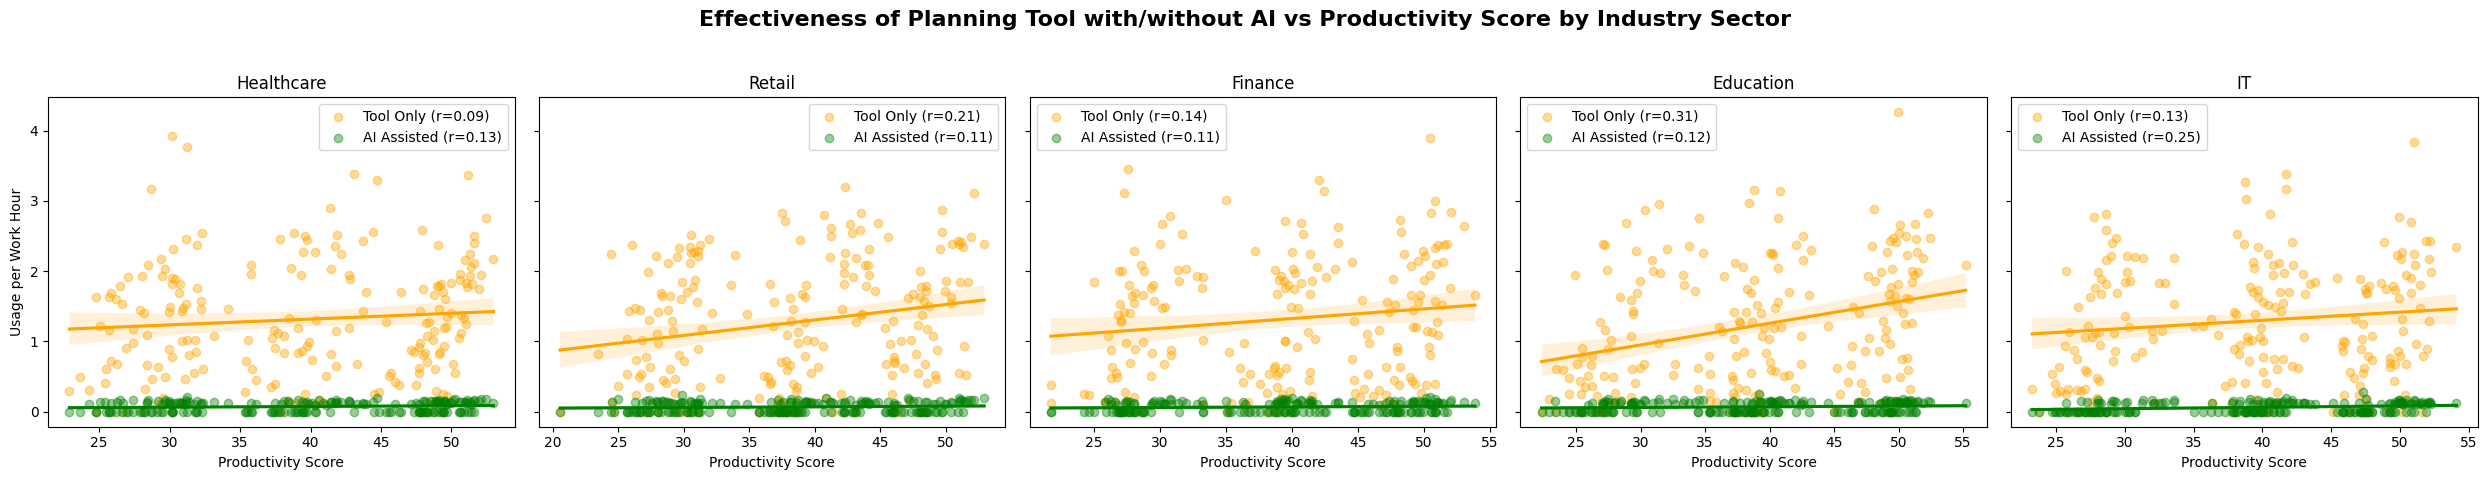

In [85]:
from scipy.stats import pearsonr

industry_sectors = df3['industry_sector'].dropna().unique()[:5]

fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 5), sharey=True)
fig.suptitle('Effectiveness of Planning Tool with/without AI vs Productivity Score by Industry Sector',
             fontsize=16, fontweight='bold')

for ax, sector in zip(axes, industry_sectors):
    subset = df3[df3['industry_sector'] == sector].dropna(subset=[
        'productivity_score',
        'tool_usage_frequency_per_work_hour',
        'AI_assisted_planning_per_work_hour'
    ])

    if len(subset) > 1:
        corr_tool, _ = pearsonr(subset['productivity_score'], subset['tool_usage_frequency_per_work_hour'])
        corr_ai, _ = pearsonr(subset['productivity_score'], subset['AI_assisted_planning_per_work_hour'])

        sns.regplot(
            x='productivity_score',
            y='tool_usage_frequency_per_work_hour',
            data=subset,
            ax=ax,
            scatter=True,
            label=f'Tool Only (r={corr_tool:.2f})',
            line_kws={'color': 'orange'},
            scatter_kws={'alpha': 0.4, 'color': 'orange'}
        )

        sns.regplot(
            x='productivity_score',
            y='AI_assisted_planning_per_work_hour',
            data=subset,
            ax=ax,
            scatter=True,
            label=f'AI Assisted (r={corr_ai:.2f})',
            line_kws={'color': 'green'},
            scatter_kws={'alpha': 0.4, 'color': 'green'}
        )
    else:
        ax.text(0.5, 0.5, "Not enough data", ha='center', va='center', transform=ax.transAxes)

    ax.set_title(sector)
    ax.set_xlabel("Productivity Score")
    if ax == axes[0]:
        ax.set_ylabel("Usage per Work Hour")
    else:
        ax.set_ylabel("")
    ax.legend()

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

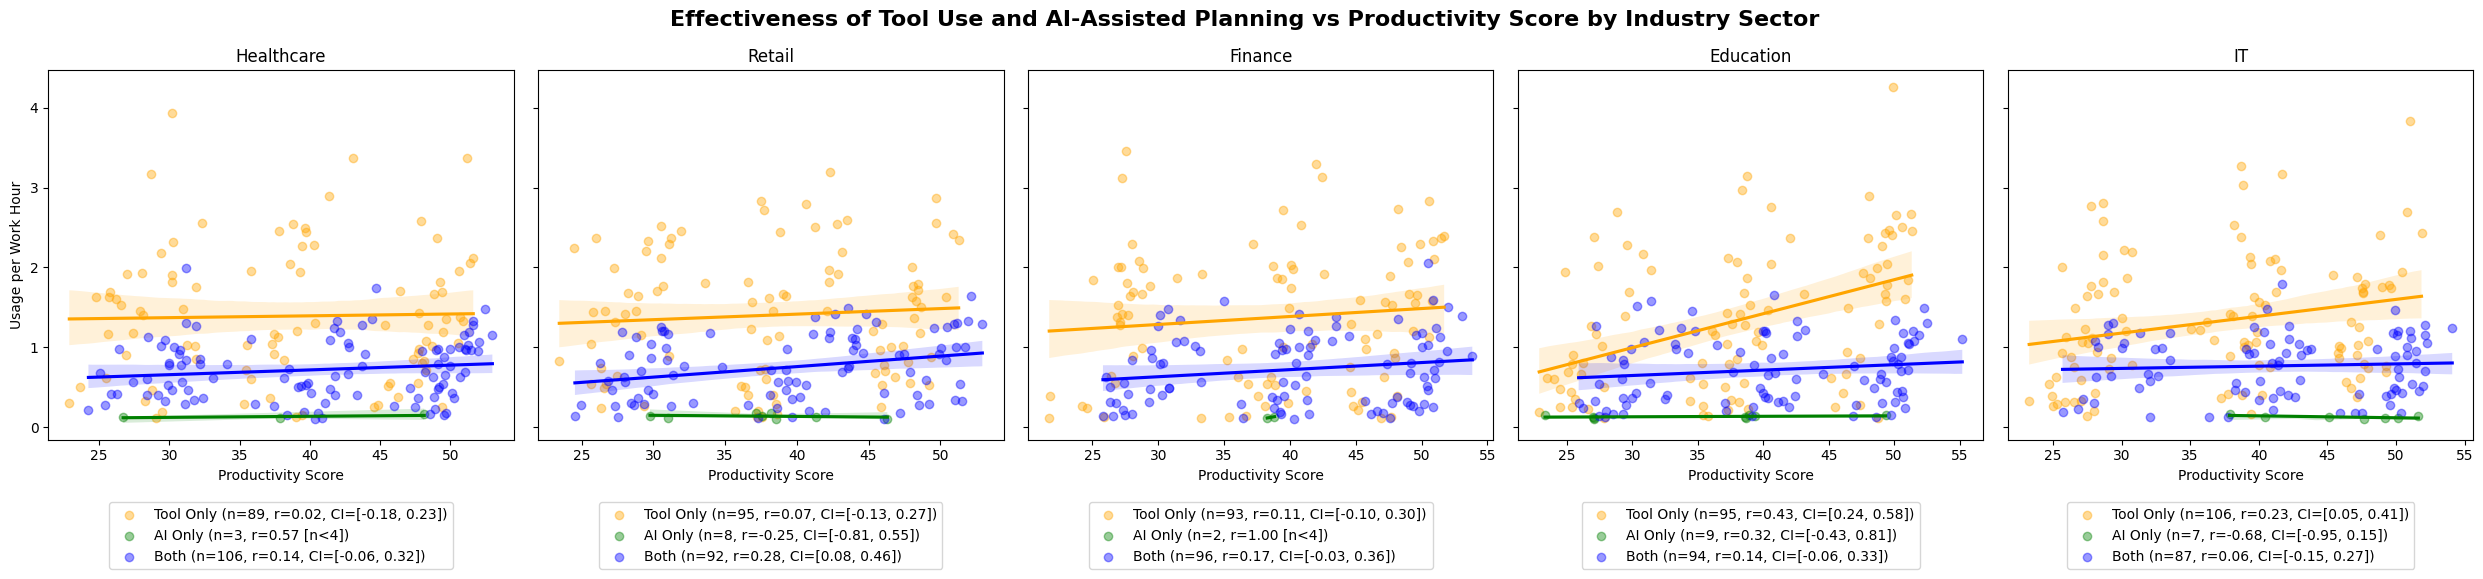

In [86]:
from scipy.stats import pearsonr

# Categorize usage types
def categorize_usage(row):
    tool = row['tool_usage_frequency_per_work_hour'] > 0
    ai = row['AI_assisted_planning_per_work_hour'] > 0
    if tool and not ai:
        return 'Tool Only'
    elif ai and not tool:
        return 'AI Only'
    elif tool and ai:
        return 'Both'
    else:
        return 'None'

df3['usage_category'] = df3.apply(categorize_usage, axis=1)

# Filter relevant users
df3_filtered = df3[df3['usage_category'].isin(['Tool Only', 'AI Only', 'Both'])]

# Select top 5 industry sectors
industry_sectors = df3_filtered['industry_sector'].dropna().unique()[:5]

# Helper function to compute confidence intervals
def pearsonr_confidence_interval(r, n, confidence_level=0.95):
    if n <= 3:
        return None  # Not enough data for CI
    z = np.arctanh(r)
    se = 1 / np.sqrt(n - 3)
    z_crit = 1.96  # for 95% confidence
    z_lower = z - z_crit * se
    z_upper = z + z_crit * se
    r_lower = np.tanh(z_lower)
    r_upper = np.tanh(z_upper)
    return r_lower, r_upper

# Set up figure
fig, axes = plt.subplots(nrows=1, ncols=5, figsize=(25, 6), sharey=True)
fig.suptitle('Effectiveness of Tool Use and AI-Assisted Planning vs Productivity Score by Industry Sector',
             fontsize=16, fontweight='bold')

colors = {'Tool Only': 'orange', 'AI Only': 'green', 'Both': 'blue'}

# Create each subplot
for ax, sector in zip(axes, industry_sectors):
    subset = df3_filtered[df3_filtered['industry_sector'] == sector]
    plotted = False

    for category in ['Tool Only', 'AI Only', 'Both']:
        cat_data = subset[subset['usage_category'] == category]

        if len(cat_data) > 1:
            if category == 'Tool Only':
                y = 'tool_usage_frequency_per_work_hour'
            elif category == 'AI Only':
                y = 'AI_assisted_planning_per_work_hour'
            else:  # Both
                cat_data = cat_data.copy()
                cat_data['avg_usage'] = (
                    cat_data['tool_usage_frequency_per_work_hour'] +
                    cat_data['AI_assisted_planning_per_work_hour']
                ) / 2
                y = 'avg_usage'

            corr, _ = pearsonr(cat_data['productivity_score'], cat_data[y])
            n_people = len(cat_data)

            ci = pearsonr_confidence_interval(corr, n_people)
            if ci:
                r_label = f'{corr:.2f}, CI=[{ci[0]:.2f}, {ci[1]:.2f}]'
            else:
                r_label = f'{corr:.2f} [n<4]'

            sns.regplot(
                x='productivity_score',
                y=y,
                data=cat_data,
                ax=ax,
                scatter=True,
                label=f'{category} (n={n_people}, r={r_label})',
                line_kws={'color': colors[category]},
                scatter_kws={'alpha': 0.4, 'color': colors[category]}
            )

            plotted = True

    if not plotted:
        ax.text(0.5, 0.5, "Not enough data", ha='center', va='center', transform=ax.transAxes)

    ax.set_title(sector)
    ax.set_xlabel("Productivity Score")
    if ax == axes[0]:
        ax.set_ylabel("Usage per Work Hour")
    else:
        ax.set_ylabel("")
    ax.legend(loc='upper center', bbox_to_anchor=(0.5, -0.15), frameon=True)

plt.tight_layout()
plt.show()

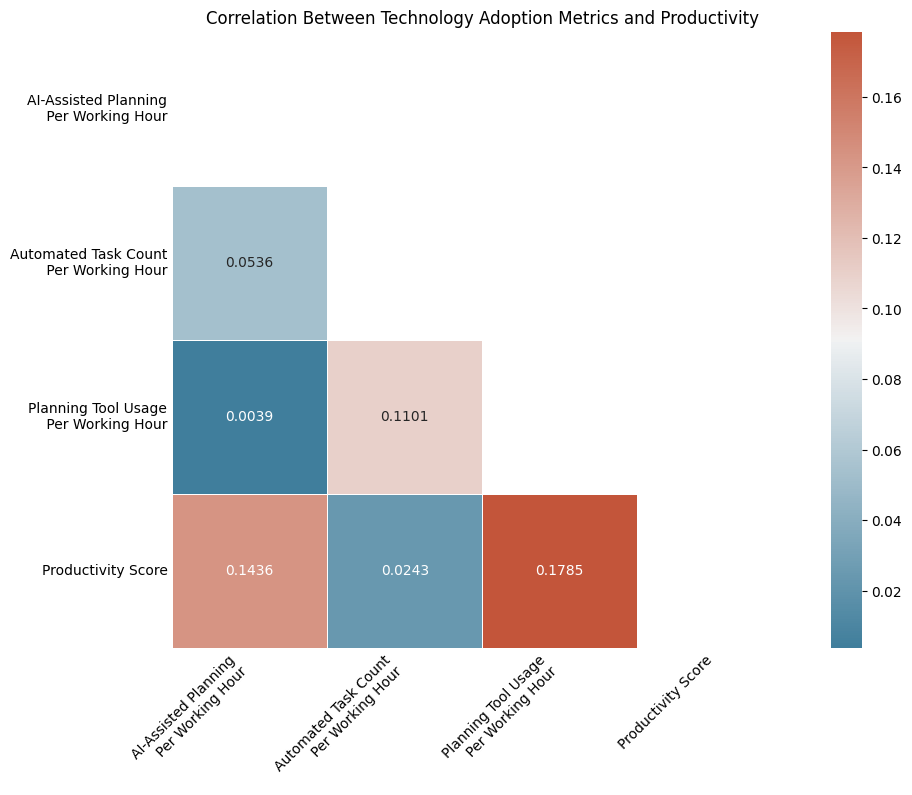

In [87]:
corr_cols = {
    'AI_assisted_planning_per_work_hour': 'AI-Assisted Planning\n Per Working Hour',
    'automated_task_count_per_work_hour': 'Automated Task Count\n Per Working Hour',
    'tool_usage_frequency_per_work_hour': 'Planning Tool Usage\n Per Working Hour',
    'productivity_score': 'Productivity Score'
}
df_corr = df3[list(corr_cols.keys())].rename(columns=corr_cols)
corr = df_corr.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

plt.figure(figsize=(10, 8))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
# Draw the heatmap with the mask
ax = sns.heatmap(corr, mask=mask, annot=True, cmap=cmap, fmt=".4f", linewidths=.5 )

# Remove the first label on y-axis and the last on x-axis
xticks = ax.get_xticklabels()
yticks = ax.get_yticklabels()

ax.tick_params(axis='both', length=0)
ax.set_xticklabels(xticks, rotation=45, ha='right')
ax.set_yticklabels(yticks, rotation=0)

plt.title('Correlation Between Technology Adoption Metrics and Productivity')
plt.show()